### MARKETING ATTRIBUTION & ROI ANALYSIS
About This Project
A hands-on learning project exploring multi-channel marketing attribution and ROI optimization.
This analysis uses realistic synthetic data to demonstrate practical application of marketing analytics concepts and attribution modeling techniques learned through self-study.

### About the Dataset
Synthetic E-Commerce Customer Journey Data
I generated this dataset based on 2024-2025 e-commerce industry benchmarks from research sources including Oberlo, Shopify, Statista, and Google Analytics. The synthetic approach allows me to work with realistic business scenarios while practicing data analysis skills in a controlled environment.

Dataset Characteristics:
2,200 unique customers generating 5,500+ sessions over a 2-month period
Industry-standard conversion rate: 2.3% (matching 2024 e-commerce benchmarks)
Average order value: $95 (typical for tech products)
Multi-touch attribution patterns: Realistic customer journeys across 7 marketing channels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, pearsonr
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11

print(" All libraries imported ")

 All libraries imported 


#### Data Loading & Initial Exploration
1, What does our dataset contain, and is it ready for analysis?

In [2]:
df = pd.read_csv('../data/customer_journey_sessions.csv')
df_spend = pd.read_csv('../data/channel_marketing_budget.csv')
print("MARKETING ATTRIBUTION & ROI ANALYSIS")
print("*" * 80)
print(f"\nDataset Info:")
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print(f"Unique Customers: {df['fullVisitorId'].nunique():,}")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 Rows:")
print(df.head())
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nMarketing Spend Data:\n{df_spend}")

MARKETING ATTRIBUTION & ROI ANALYSIS
********************************************************************************

Dataset Info:
Total Rows: 4,331
Total Columns: 14
Unique Customers: 2,200
Date Range: 20170701 to 20170915

Data Types:
sessionId                     object
fullVisitorId                 object
date                           int64
channelGrouping               object
device.browser                object
device.deviceCategory         object
totals.pageviews               int64
totals.timeOnSite              int64
totals.bounces                 int64
totals.transactions            int64
totals.transactionRevenue    float64
totals.visits                  int64
visitNumber                    int64
sessionQualityDim              int64
dtype: object

First 5 Rows:
  sessionId fullVisitorId      date channelGrouping device.browser  \
0  S0000001    USER_00001  20170810         Display         Chrome   
1  S0000002    USER_00001  20170811          Social         Chrome   
2  S

### Key Performance Metrics Overview
2, What are the overall business performance indicators across all marketing channels?

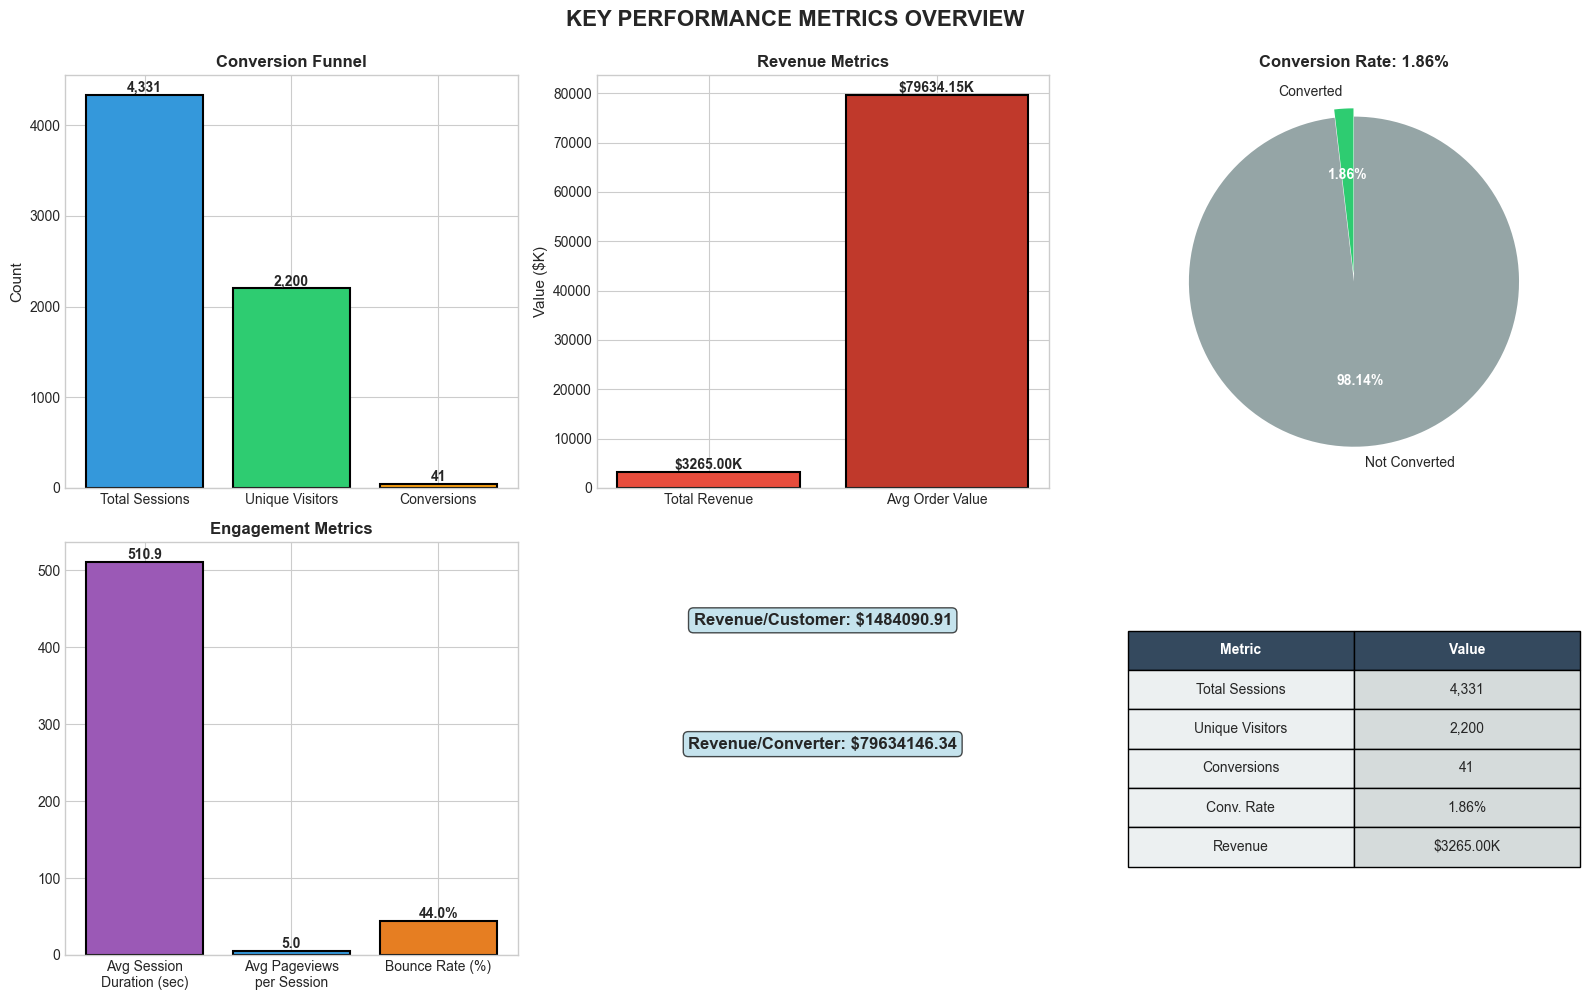


KEY METRICS SUMMARY:
   Total Sessions: 4,331
   Unique Customers: 2,200
   Conversions: 41
   Conversion Rate: 1.86%
   Total Revenue: $3265.00K
   Average Order Value: $79634.15
   Average Session Duration: 510.9 seconds
   Bounce Rate: 43.99%


In [3]:
# Calculate key metrics
total_sessions = len(df)
unique_customers = df['fullVisitorId'].nunique()
converted_customers = df[df['totals.transactions'] > 0]['fullVisitorId'].nunique()
conversion_rate = (converted_customers / unique_customers) * 100
total_conversions = df['totals.transactions'].sum()
total_revenue = df['totals.transactionRevenue'].sum() / 1000000
avg_order_value = (df['totals.transactionRevenue'].sum() / df['totals.transactions'].sum() / 1000000) * 1000
avg_session_duration = df['totals.timeOnSite'].mean()
bounce_rate = (df['totals.bounces'].sum() / total_sessions) * 100
avg_pageviews = df['totals.pageviews'].mean()

# Create metrics visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('KEY PERFORMANCE METRICS OVERVIEW', fontsize=16, fontweight='bold', y=0.995)

# Conversion Funnel
ax = axes[0, 0]
stages = ['Total Sessions', 'Unique Visitors', 'Conversions']
values = [total_sessions, unique_customers, total_conversions]
colors = ['#3498db', '#2ecc71', '#f39c12']
bars = ax.bar(stages, values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_title('Conversion Funnel', fontweight='bold', fontsize=12)
ax.set_ylabel('Count')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# Revenue Overview
ax = axes[0, 1]
metrics = ['Total Revenue', 'Avg Order Value']
revenue_values = [total_revenue, avg_order_value]
colors = ['#e74c3c', '#c0392b']
bars = ax.bar(metrics, revenue_values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_title('Revenue Metrics', fontweight='bold', fontsize=12)
ax.set_ylabel('Value ($K)')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.2f}K', ha='center', va='bottom', fontweight='bold')

# Conversion Rate
ax = axes[0, 2]
conversion_pct = conversion_rate
non_conversion = 100 - conversion_pct
wedges, texts, autotexts = ax.pie([conversion_pct, non_conversion],
                                    labels=['Converted', 'Not Converted'],
                                    autopct='%1.2f%%',
                                    colors=['#2ecc71', '#95a5a6'],
                                    explode=(0.05, 0),
                                    startangle=90)
ax.set_title(f'Conversion Rate: {conversion_rate:.2f}%', fontweight='bold', fontsize=12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Engagement Metrics
ax = axes[1, 0]
engagement = ['Avg Session\nDuration (sec)', 'Avg Pageviews\nper Session', 'Bounce Rate (%)']
engagement_values = [avg_session_duration, avg_pageviews, bounce_rate]
colors = ['#9b59b6', '#3498db', '#e67e22']
bars = ax.bar(engagement, engagement_values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_title('Engagement Metrics', fontweight='bold', fontsize=12)
for i, bar in enumerate(bars):
    height = bar.get_height()
    label = f'{height:.1f}' if i != 2 else f'{height:.1f}%'
    ax.text(bar.get_x() + bar.get_width()/2., height,
            label, ha='center', va='bottom', fontweight='bold')

# Customer Lifetime Metrics
ax = axes[1, 1]
avg_revenue_per_customer = total_revenue * 1000000 / unique_customers
revenue_per_converter = total_revenue * 1000000 / converted_customers
metrics_text = [f'Revenue/Customer: ${avg_revenue_per_customer:.2f}',
                f'Revenue/Converter: ${revenue_per_converter:.2f}']
ax.axis('off')
for i, text in enumerate(metrics_text):
    ax.text(0.5, 0.8 - i*0.3, text, fontsize=12, fontweight='bold',
            ha='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Summary Stats Table
ax = axes[1, 2]
ax.axis('off')
summary_data = [
    ['Metric', 'Value'],
    ['Total Sessions', f'{total_sessions:,}'],
    ['Unique Visitors', f'{unique_customers:,}'],
    ['Conversions', f'{int(total_conversions):,}'],
    ['Conv. Rate', f'{conversion_rate:.2f}%'],
    ['Revenue', f'${total_revenue:.2f}K']
]
table = ax.table(cellText=summary_data, cellLoc='center', loc='center',
                colWidths=[0.5, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
for i in range(len(summary_data)):
    if i == 0:
        table[(i, 0)].set_facecolor('#34495e')
        table[(i, 1)].set_facecolor('#34495e')
        table[(i, 0)].set_text_props(weight='bold', color='white')
        table[(i, 1)].set_text_props(weight='bold', color='white')
    else:
        table[(i, 0)].set_facecolor('#ecf0f1')
        table[(i, 1)].set_facecolor('#d5dbdb')

plt.tight_layout()
plt.savefig('../output/key_metrics_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nKEY METRICS SUMMARY:")
print(f"   Total Sessions: {total_sessions:,}")
print(f"   Unique Customers: {unique_customers:,}")
print(f"   Conversions: {int(total_conversions):,}")
print(f"   Conversion Rate: {conversion_rate:.2f}%")
print(f"   Total Revenue: ${total_revenue:.2f}K")
print(f"   Average Order Value: ${avg_order_value:.2f}")
print(f"   Average Session Duration: {avg_session_duration:.1f} seconds")
print(f"   Bounce Rate: {bounce_rate:.2f}%")


### Channel Performance Analysis
3, How does each marketing channel perform across key engagement and revenue metrics?


Detailed Channel Performance:
                 Sessions  Unique_Visitors  Avg_Pageviews  Avg_Session_Duration  Conversions  Revenue_K  Bounces  Conv_Rate_%  Bounce_Rate_%  Revenue_Per_Session
channelGrouping                                                                                                                                                  
Email                 745              663       5.020134            507.934228           12     1081.0      335     1.809955      44.966443          1451.006711
Paid Search           683              610       4.986823            510.379209           14     1014.0      309     2.295082      45.241581          1484.626647
Organic Search        876              802       4.889269            507.181507            5      302.0      384     0.623441      43.835616           344.748858
Referral              296              279       5.003378            507.000000            3      283.0      134     1.075269      45.270270           956.0810

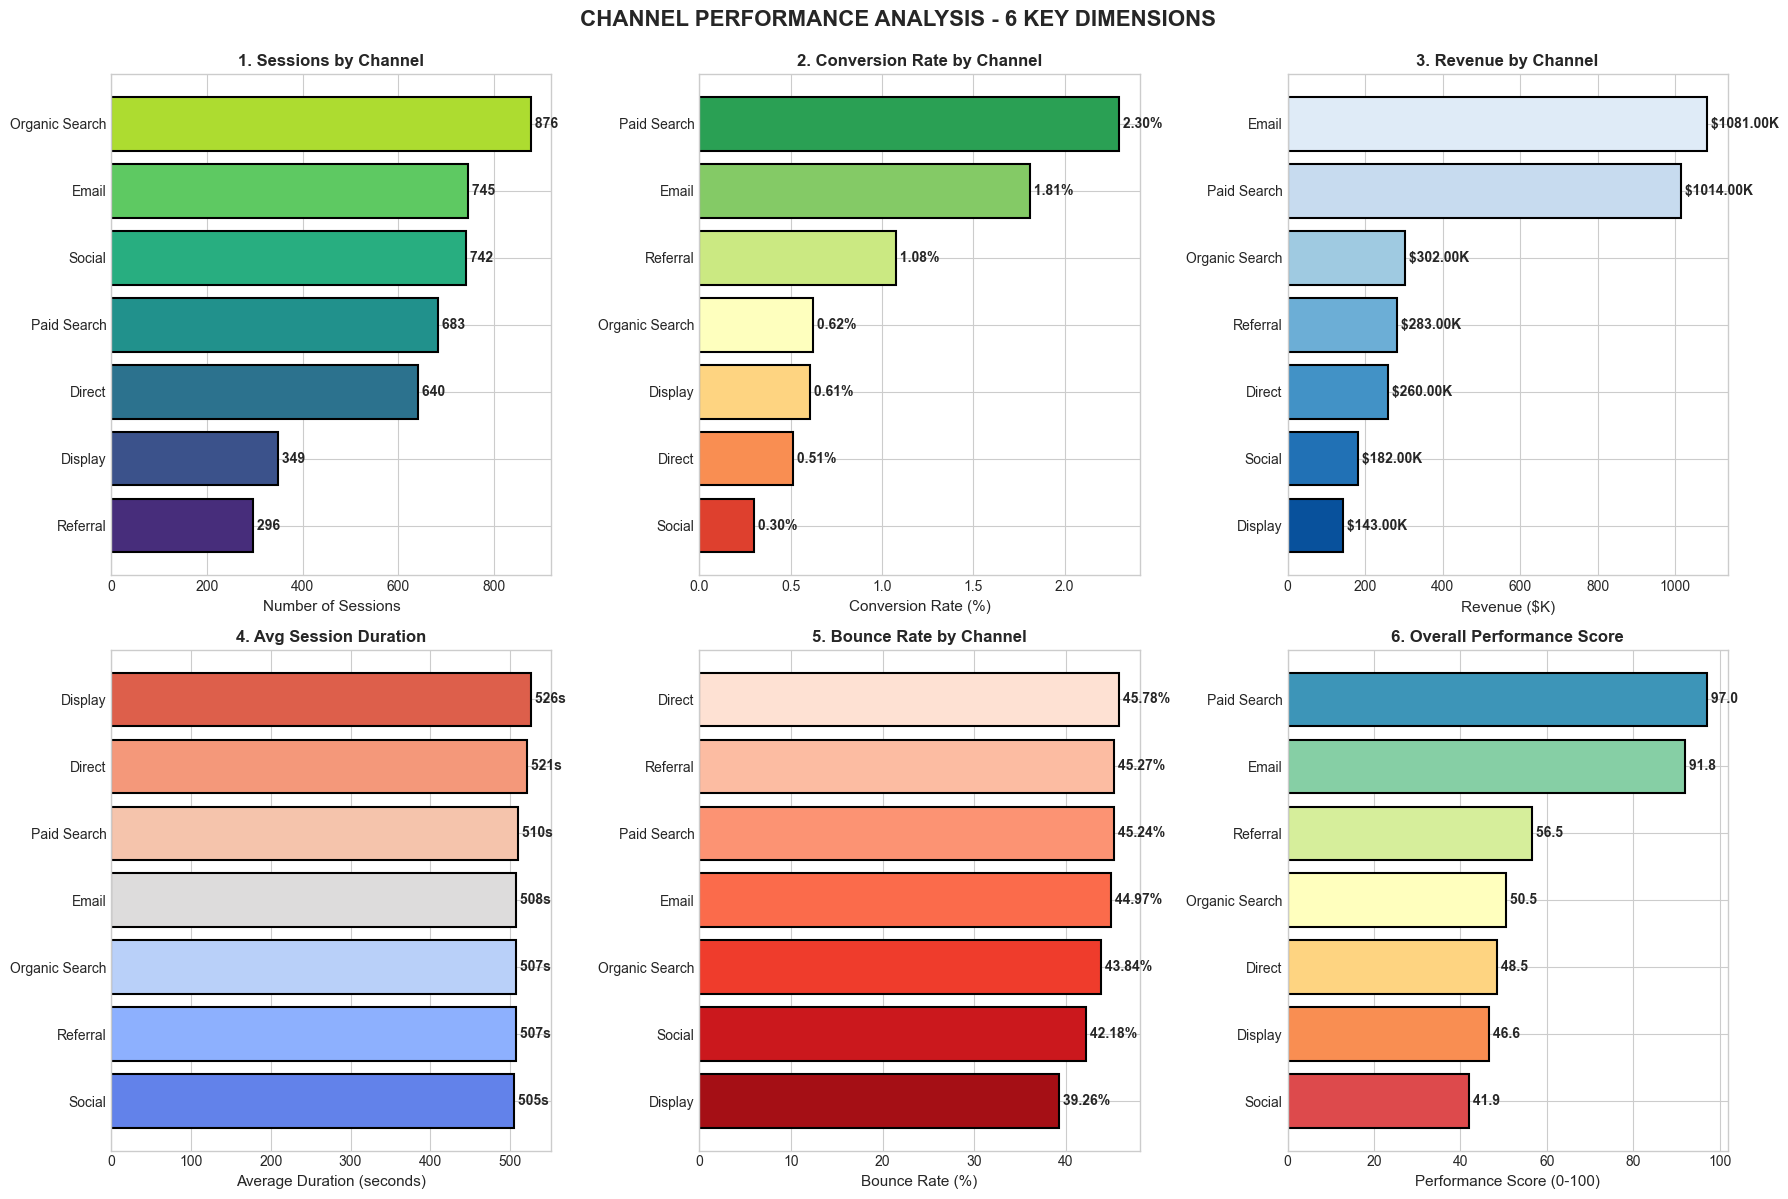

In [4]:
# Channel analysis with multiple dimensions
channel_analysis = df.groupby('channelGrouping').agg({
    'sessionId': 'count',
    'fullVisitorId': 'nunique',
    'totals.pageviews': 'mean',
    'totals.timeOnSite': 'mean',
    'totals.transactions': 'sum',
    'totals.transactionRevenue': lambda x: x.sum() / 1000000,
    'totals.bounces': 'sum'
}).rename(columns={
    'sessionId': 'Sessions',
    'fullVisitorId': 'Unique_Visitors',
    'totals.pageviews': 'Avg_Pageviews',
    'totals.timeOnSite': 'Avg_Session_Duration',
    'totals.transactions': 'Conversions',
    'totals.transactionRevenue': 'Revenue_K',
    'totals.bounces': 'Bounces'
})

channel_analysis['Conv_Rate_%'] = (channel_analysis['Conversions'] / channel_analysis['Unique_Visitors'] * 100)
channel_analysis['Bounce_Rate_%'] = (channel_analysis['Bounces'] / channel_analysis['Sessions'] * 100)
channel_analysis['Revenue_Per_Session'] = channel_analysis['Revenue_K'] * 1000 / channel_analysis['Sessions']
channel_analysis = channel_analysis.sort_values('Revenue_K', ascending=False)

print(f"\nDetailed Channel Performance:")
print(channel_analysis.to_string())

# Comprehensive channel visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(' CHANNEL PERFORMANCE ANALYSIS - 6 KEY DIMENSIONS', fontsize=16, fontweight='bold', y=0.995)

# Sessions by Channel
ax = axes[0, 0]
sessions_data = channel_analysis['Sessions'].sort_values(ascending=True)
colors = sns.color_palette('viridis', len(sessions_data))
bars = ax.barh(range(len(sessions_data)), sessions_data.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(sessions_data)))
ax.set_yticklabels(sessions_data.index)
ax.set_xlabel('Number of Sessions')
ax.set_title('1. Sessions by Channel', fontweight='bold', fontsize=12)
for i, (idx, val) in enumerate(sessions_data.items()):
    ax.text(val, i, f' {int(val):,}', va='center', fontweight='bold')

# Conversion Rate by Channel
ax = axes[0, 1]
conv_data = channel_analysis['Conv_Rate_%'].sort_values(ascending=True)
colors = sns.color_palette('RdYlGn', len(conv_data))
bars = ax.barh(range(len(conv_data)), conv_data.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(conv_data)))
ax.set_yticklabels(conv_data.index)
ax.set_xlabel('Conversion Rate (%)')
ax.set_title('2. Conversion Rate by Channel', fontweight='bold', fontsize=12)
for i, (idx, val) in enumerate(conv_data.items()):
    ax.text(val, i, f' {val:.2f}%', va='center', fontweight='bold')

# Revenue by Channel
ax = axes[0, 2]
revenue_data = channel_analysis['Revenue_K'].sort_values(ascending=True)
colors = sns.color_palette('Blues_r', len(revenue_data))
bars = ax.barh(range(len(revenue_data)), revenue_data.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(revenue_data)))
ax.set_yticklabels(revenue_data.index)
ax.set_xlabel('Revenue ($K)')
ax.set_title('3. Revenue by Channel', fontweight='bold', fontsize=12)
for i, (idx, val) in enumerate(revenue_data.items()):
    ax.text(val, i, f' ${val:.2f}K', va='center', fontweight='bold')

# Average Session Duration
ax = axes[1, 0]
duration_data = channel_analysis['Avg_Session_Duration'].sort_values(ascending=True)
colors = sns.color_palette('coolwarm', len(duration_data))
bars = ax.barh(range(len(duration_data)), duration_data.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(duration_data)))
ax.set_yticklabels(duration_data.index)
ax.set_xlabel('Average Duration (seconds)')
ax.set_title('4. Avg Session Duration', fontweight='bold', fontsize=12)
for i, (idx, val) in enumerate(duration_data.items()):
    ax.text(val, i, f' {val:.0f}s', va='center', fontweight='bold')

# Bounce Rate by Channel
ax = axes[1, 1]
bounce_data = channel_analysis['Bounce_Rate_%'].sort_values(ascending=True)
colors = sns.color_palette('Reds_r', len(bounce_data))
bars = ax.barh(range(len(bounce_data)), bounce_data.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(bounce_data)))
ax.set_yticklabels(bounce_data.index)
ax.set_xlabel('Bounce Rate (%)')
ax.set_title('5. Bounce Rate by Channel', fontweight='bold', fontsize=12)
for i, (idx, val) in enumerate(bounce_data.items()):
    ax.text(val, i, f' {val:.2f}%', va='center', fontweight='bold')

# Channel Performance Score (composite metric)
ax = axes[1, 2]
# composite score
normalized_conv = channel_analysis['Conv_Rate_%'] / channel_analysis['Conv_Rate_%'].max() * 100
normalized_revenue = channel_analysis['Revenue_K'] / channel_analysis['Revenue_K'].max() * 100
normalized_duration = channel_analysis['Avg_Session_Duration'] / channel_analysis['Avg_Session_Duration'].max() * 100
performance_score = (normalized_conv + normalized_revenue + normalized_duration) / 3
performance_score = performance_score.sort_values(ascending=True)

colors = sns.color_palette('Spectral', len(performance_score))
bars = ax.barh(range(len(performance_score)), performance_score.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(performance_score)))
ax.set_yticklabels(performance_score.index)
ax.set_xlabel('Performance Score (0-100)')
ax.set_title('6. Overall Performance Score', fontweight='bold', fontsize=12)
for i, (idx, val) in enumerate(performance_score.items()):
    ax.text(val, i, f' {val:.1f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../output/channel_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


### Device & Browser Performance Analysis
# 4, How do different devices and browsers impact user engagement and conversion behavior?


 DEVICE PERFORMANCE:
                       Sessions  Unique_Visitors  Avg_Pageviews  Avg_Duration  Conversions  Revenue_K  Bounces  Conv_Rate_%  Bounce_Rate_%  Revenue_Per_Visitor
device.deviceCategory                                                                                                                                          
desktop                    2562             1703       4.957065    509.473849           29     2248.0     1120     1.702877      43.715847          1320.023488
mobile                     1371             1092       5.002918    512.013129            9      762.0      615     0.824176      44.857768           697.802198
tablet                      398              378       4.927136    516.429648            3      255.0      170     0.793651      42.713568           674.603175

BROWSER DISTRIBUTION:
                Sessions  Conversions  Revenue_K  Conv_Rate_%
device.browser                                               
Chrome              2713       

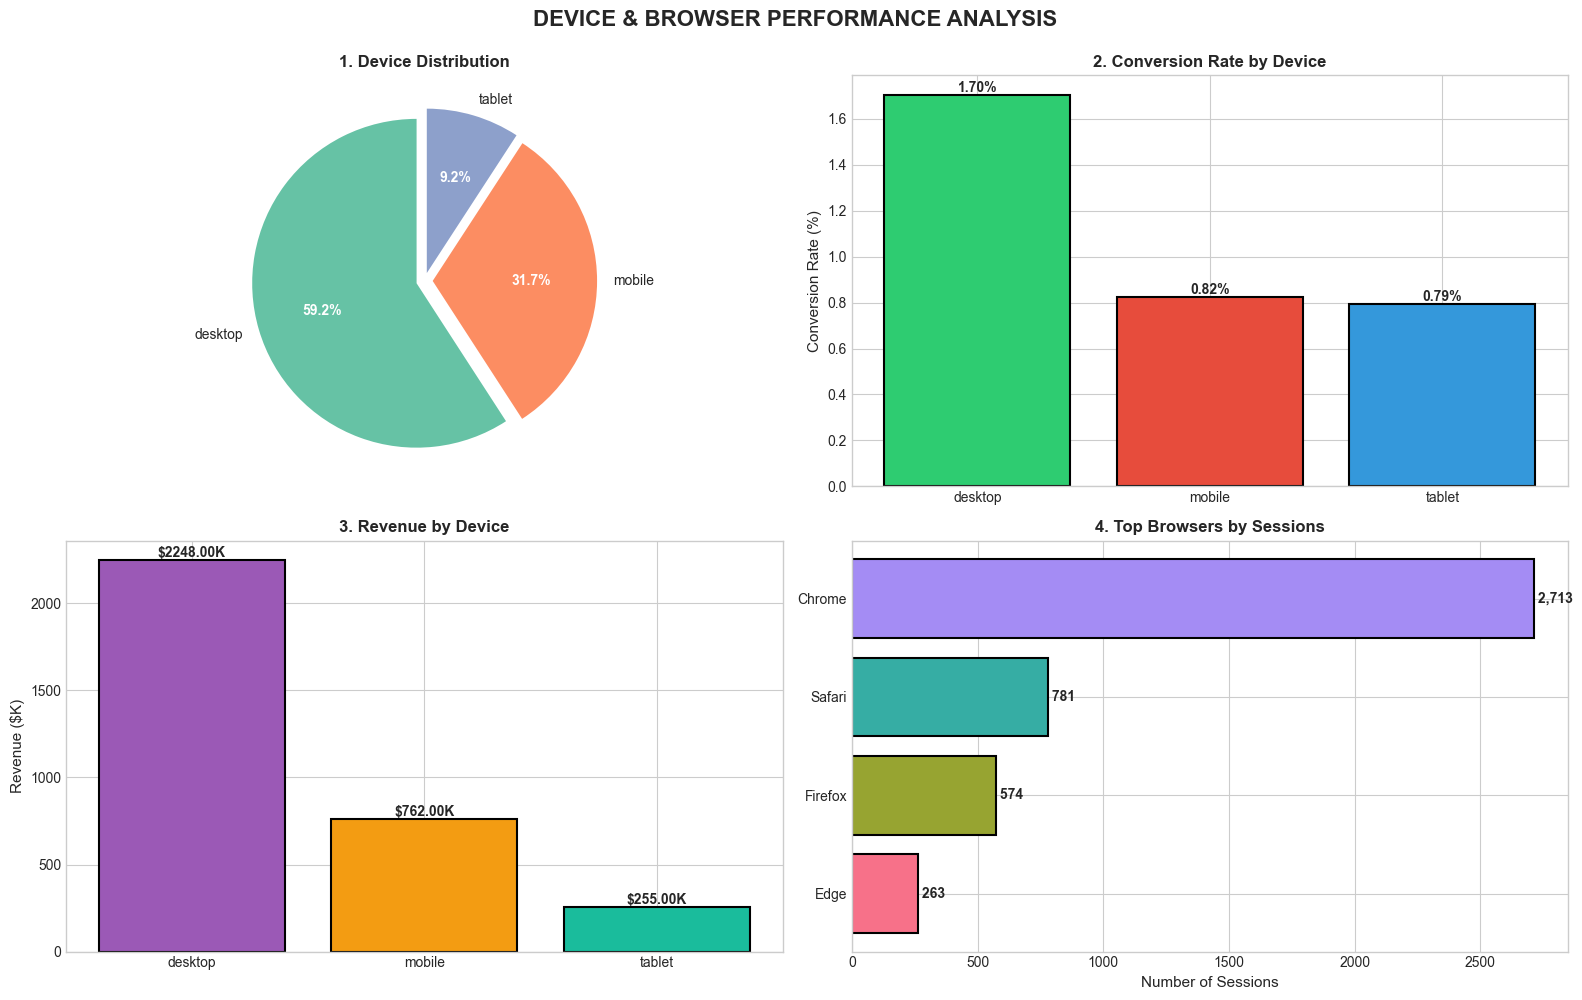

In [5]:
# Device analysis
device_analysis = df.groupby('device.deviceCategory').agg({'sessionId': 'count','fullVisitorId': 'nunique','totals.pageviews': 'mean','totals.timeOnSite': 'mean','totals.transactions': 'sum','totals.transactionRevenue': lambda x: x.sum() / 1000000,
    'totals.bounces': 'sum'}).rename(columns={
    'sessionId': 'Sessions',
    'fullVisitorId': 'Unique_Visitors',
    'totals.pageviews': 'Avg_Pageviews',
    'totals.timeOnSite': 'Avg_Duration',
    'totals.transactions': 'Conversions',
    'totals.transactionRevenue': 'Revenue_K',
    'totals.bounces': 'Bounces'
})

device_analysis['Conv_Rate_%'] = (device_analysis['Conversions'] / device_analysis['Unique_Visitors'] * 100)
device_analysis['Bounce_Rate_%'] = (device_analysis['Bounces'] / device_analysis['Sessions'] * 100)
device_analysis['Revenue_Per_Visitor'] = device_analysis['Revenue_K'] * 1000 / device_analysis['Unique_Visitors']

# Browser analysis
browser_analysis = df.groupby('device.browser').agg({
    'sessionId': 'count',
    'totals.transactions': 'sum',
    'totals.transactionRevenue': lambda x: x.sum() / 1000000
}).rename(columns={
    'sessionId': 'Sessions',
    'totals.transactions': 'Conversions',
    'totals.transactionRevenue': 'Revenue_K'
})
browser_analysis['Conv_Rate_%'] = (browser_analysis['Conversions'] / browser_analysis['Sessions'] * 100)
browser_analysis = browser_analysis.sort_values('Sessions', ascending=False)

print(f"\n DEVICE PERFORMANCE:")
print(device_analysis.to_string())
print(f"\nBROWSER DISTRIBUTION:")
print(browser_analysis.to_string())

# Device and Browser visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('DEVICE & BROWSER PERFORMANCE ANALYSIS', fontsize=16, fontweight='bold', y=0.995)

# Device Distribution (Pie)
ax = axes[0, 0]
device_dist = df['device.deviceCategory'].value_counts()
colors = sns.color_palette('Set2', len(device_dist))
wedges, texts, autotexts = ax.pie(device_dist.values, labels=device_dist.index, autopct='%1.1f%%',
                                    colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
ax.set_title('1. Device Distribution', fontweight='bold', fontsize=12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Device Conversion Comparison
ax = axes[0, 1]
devices = device_analysis.index
conv_rates = device_analysis['Conv_Rate_%']
colors = ['#2ecc71', '#e74c3c', '#3498db']
bars = ax.bar(devices, conv_rates, color=colors, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Conversion Rate (%)')
ax.set_title('2. Conversion Rate by Device', fontweight='bold', fontsize=12)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

# Device Revenue Comparison
ax = axes[1, 0]
revenue_by_device = device_analysis['Revenue_K']
colors = ['#9b59b6', '#f39c12', '#1abc9c']
bars = ax.bar(devices, revenue_by_device, color=colors, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Revenue ($K)')
ax.set_title('3. Revenue by Device', fontweight='bold', fontsize=12)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.2f}K', ha='center', va='bottom', fontweight='bold')

# Browser Performance
ax = axes[1, 1]
top_browsers = browser_analysis.head(6).sort_values('Sessions', ascending=True)
colors = sns.color_palette('husl', len(top_browsers))
bars = ax.barh(range(len(top_browsers)), top_browsers['Sessions'].values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(top_browsers)))
ax.set_yticklabels(top_browsers.index)
ax.set_xlabel('Number of Sessions')
ax.set_title('4. Top Browsers by Sessions', fontweight='bold', fontsize=12)
for i, (idx, val) in enumerate(zip(top_browsers.index, top_browsers['Sessions'].values)):
    ax.text(val, i, f' {int(val):,}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../output/device_browser_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 5, How should we credit different marketing channels when customers interact with multiple touchpoints before converting?

MULTI-TOUCH ATTRIBUTION MODELS
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

 Journey:
   Total Journeys: 2,200
   Converted Journeys: 41
   Average Touches per Journey: 1.97
   Multi-Touch Journeys: 62.9%

ATTRIBUTION MODEL COMPARISON ($K):
                Last-Touch  First-Touch  Linear  Time-Decay  Data-Driven  Average
Email               1005.0          0.0  580.42      647.24       871.03   620.74
Paid Search         1096.0        487.0  752.10      793.39      1074.12   840.52
Organic Search       296.0        885.0  551.22      523.32       374.90   526.09
Referral             283.0        318.0  280.33      272.35       293.55   289.45
Display               69.0        378.0  237.10      219.54       154.19   211.57
Social               256.0        460.0  390.58      370.39       180.13   331.42
Direct               260.0        737.0  473.25      438.77       317.09   445.22


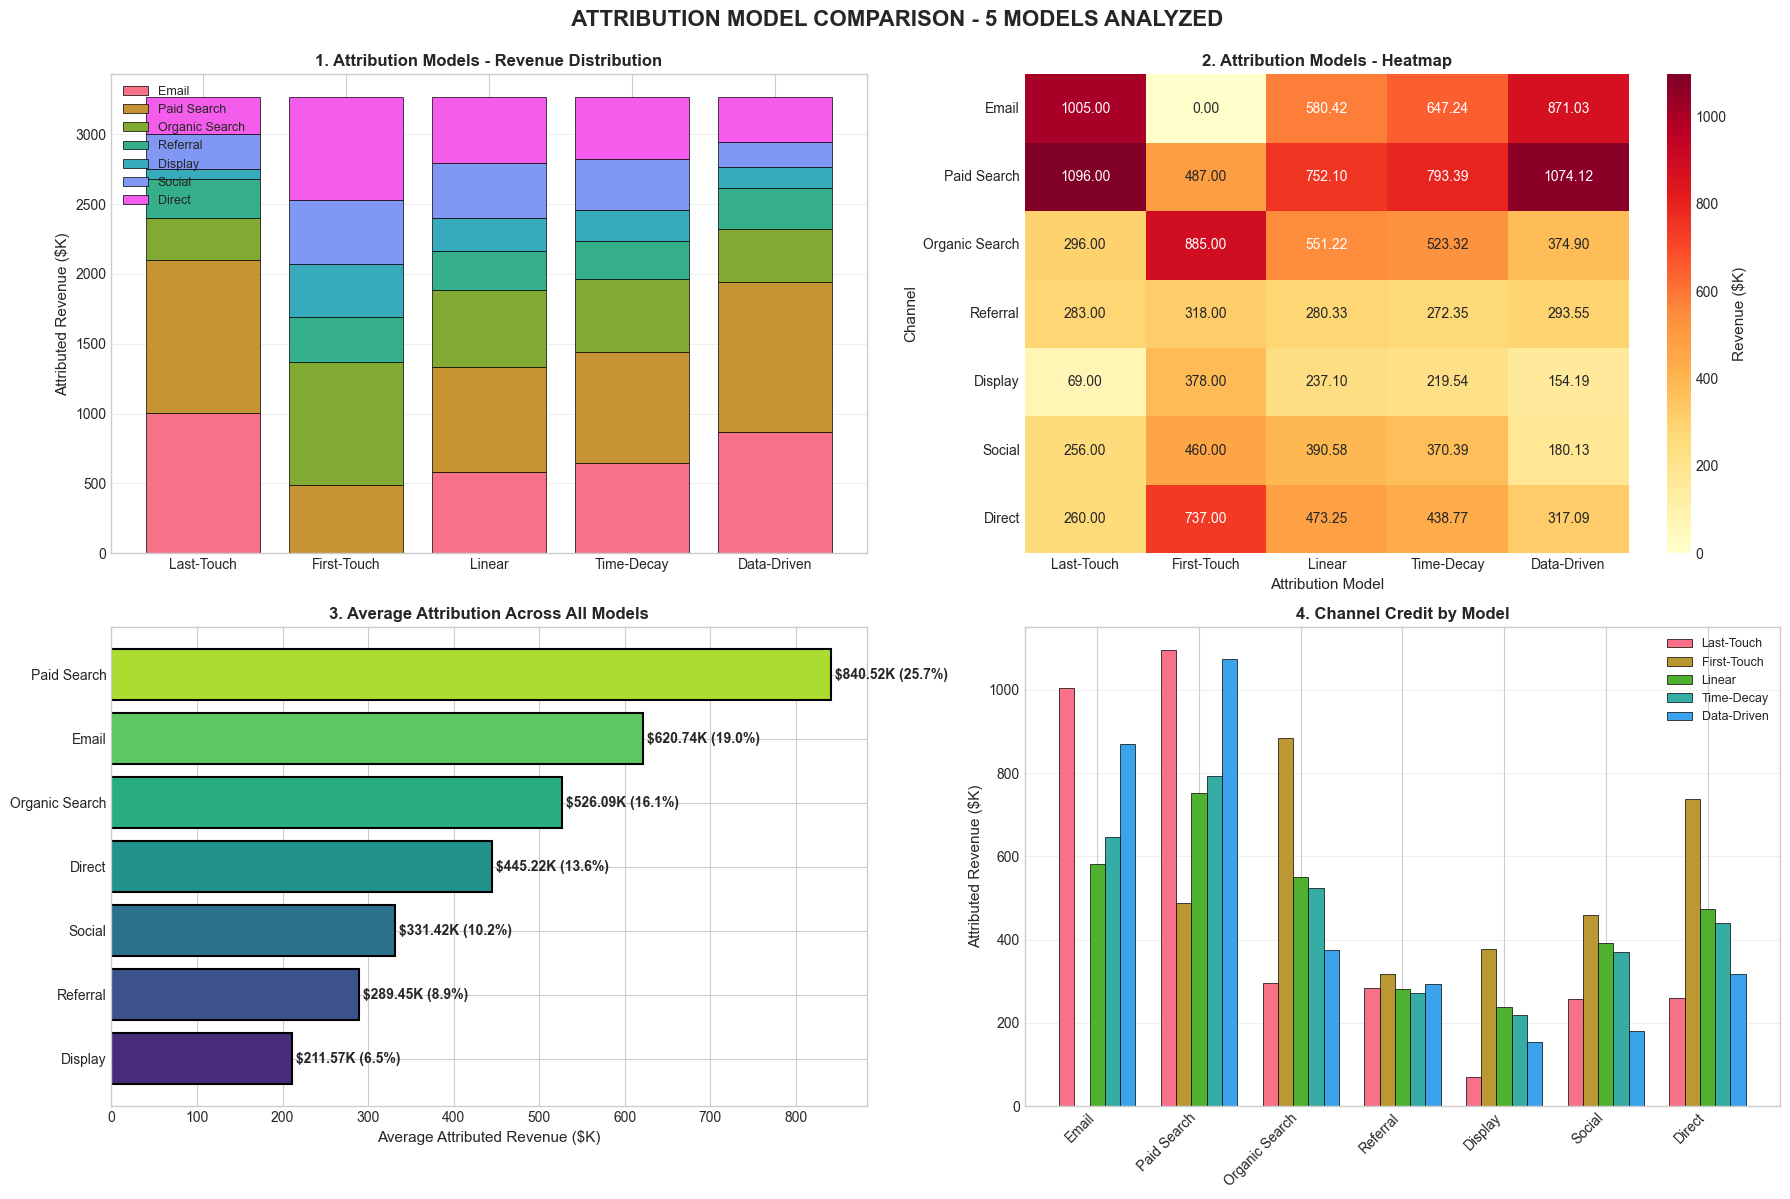

In [6]:
print("MULTI-TOUCH ATTRIBUTION MODELS")
print(f"{'|'*80}")

# Prepare data for attribution
customer_journeys = df.sort_values(['fullVisitorId', 'date']).copy()

journeys = []
for customer, group in customer_journeys.groupby('fullVisitorId'):
    channels = group['channelGrouping'].tolist()
    converted = group['totals.transactions'].sum() > 0
    revenue = group['totals.transactionRevenue'].sum() / 1000000 if converted else 0
    
    journeys.append({
        'customer_id': customer,
        'channels': channels,
        'converted': converted,
        'revenue': revenue,
        'num_touches': len(channels)
    })

journeys_df = pd.DataFrame(journeys)

print(f"\n Journey:")
print(f"   Total Journeys: {len(journeys_df):,}")
print(f"   Converted Journeys: {journeys_df['converted'].sum():,}")
print(f"   Average Touches per Journey: {journeys_df['num_touches'].mean():.2f}")
print(f"   Multi-Touch Journeys: {(journeys_df['num_touches'] > 1).sum()/len(journeys_df)*100:.1f}%")

# LAST-TOUCH
last_touch_credit = {}
for j in journeys_df[journeys_df['converted']].itertuples():
    last_channel = j.channels[-1]
    revenue = j.revenue
    last_touch_credit[last_channel] = last_touch_credit.get(last_channel, 0) + revenue

# FIRST-TOUCH
first_touch_credit = {}
for j in journeys_df[journeys_df['converted']].itertuples():
    first_channel = j.channels[0]
    revenue = j.revenue
    first_touch_credit[first_channel] = first_touch_credit.get(first_channel, 0) + revenue

# LINEAR
linear_credit = {}
for j in journeys_df[journeys_df['converted']].itertuples():
    credit_per_channel = j.revenue / len(j.channels)
    for channel in j.channels:
        linear_credit[channel] = linear_credit.get(channel, 0) + credit_per_channel

# TIME-DECAY
time_decay_credit = {}
for j in journeys_df[journeys_df['converted']].itertuples():
    n_touches = len(j.channels)
    weights = [0.8 ** (n_touches - i - 1) for i in range(n_touches)]
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]
    
    for channel, weight in zip(j.channels, weights):
        credit = j.revenue * weight
        time_decay_credit[channel] = time_decay_credit.get(channel, 0) + credit
channel_conversion_impact = {}
for channel in df['channelGrouping'].unique():
    channel_data = df[df['channelGrouping'] == channel]
    conv_rate = (channel_data['totals.transactions'].sum() / len(channel_data)) * 100
    channel_conversion_impact[channel] = conv_rate

total_impact = sum(channel_conversion_impact.values())
channel_weights = {ch: imp / total_impact for ch, imp in channel_conversion_impact.items()}

data_driven_credit = {}
for j in journeys_df[journeys_df['converted']].itertuples():
    journey_weight = sum([channel_weights.get(ch, 0) for ch in j.channels])
    
    for channel in j.channels:
        channel_weight = channel_weights.get(channel, 0) / journey_weight if journey_weight > 0 else 1/len(j.channels)
        credit = j.revenue * channel_weight
        data_driven_credit[channel] = data_driven_credit.get(channel, 0) + credit

# comparison
attribution_comparison = pd.DataFrame({
    'Last-Touch': last_touch_credit,
    'First-Touch': first_touch_credit,
    'Linear': linear_credit,
    'Time-Decay': time_decay_credit,
    'Data-Driven': data_driven_credit
}).fillna(0)

attribution_comparison['Average'] = attribution_comparison.mean(axis=1)
attribution_comparison = attribution_comparison.round(2)

print(f"\nATTRIBUTION MODEL COMPARISON ($K):")
print(attribution_comparison.to_string())

# Detailed attribution visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle(' ATTRIBUTION MODEL COMPARISON - 5 MODELS ANALYZED', fontsize=16, fontweight='bold', y=0.995)

#Bar Chart
ax = axes[0, 0]
models = ['Last-Touch', 'First-Touch', 'Linear', 'Time-Decay', 'Data-Driven']
x_pos = np.arange(len(models))
bottom = np.zeros(len(models))

colors = sns.color_palette('husl', len(attribution_comparison.index))
for i, channel in enumerate(attribution_comparison.index):
    values = [attribution_comparison.loc[channel, model] for model in models]
    ax.bar(x_pos, values, bottom=bottom, label=channel, color=colors[i], edgecolor='black', linewidth=0.5)
    bottom += values

ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=0)
ax.set_ylabel('Attributed Revenue ($K)')
ax.set_title('1. Attribution Models - Revenue Distribution', fontweight='bold', fontsize=12)
ax.legend(loc='upper left', fontsize=9)
ax.grid(axis='y', alpha=0.3)

# Heatmap
ax = axes[0, 1]
heatmap_data = attribution_comparison[['Last-Touch', 'First-Touch', 'Linear', 'Time-Decay', 'Data-Driven']]
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Revenue ($K)'})
ax.set_title('2. Attribution Models - Heatmap', fontweight='bold', fontsize=12)
ax.set_xlabel('Attribution Model')
ax.set_ylabel('Channel')

# Average Attribution
ax = axes[1, 0]
avg_attr = attribution_comparison['Average'].sort_values(ascending=True)
colors = sns.color_palette('viridis', len(avg_attr))
bars = ax.barh(range(len(avg_attr)), avg_attr.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(avg_attr)))
ax.set_yticklabels(avg_attr.index)
ax.set_xlabel('Average Attributed Revenue ($K)')
ax.set_title('3. Average Attribution Across All Models', fontweight='bold', fontsize=12)
for i, (idx, val) in enumerate(avg_attr.items()):
    pct = (val / avg_attr.sum() * 100)
    ax.text(val, i, f' ${val:.2f}K ({pct:.1f}%)', va='center', fontweight='bold')

# Model Comparison Radar Chart 
ax = axes[1, 1]
channels = attribution_comparison.index
x_pos = np.arange(len(channels))
width = 0.15

for i, model in enumerate(models):
    offset = width * (i - 2)
    values = [attribution_comparison.loc[ch, model] for ch in channels]
    ax.bar(x_pos + offset, values, width, label=model, edgecolor='black', linewidth=0.5)

ax.set_xticks(x_pos)
ax.set_xticklabels(channels, rotation=45, ha='right')
ax.set_ylabel('Attributed Revenue ($K)')
ax.set_title('4. Channel Credit by Model', fontweight='bold', fontsize=12)
ax.legend(loc='upper right', fontsize=9)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../output/attribution_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 6, How does the number of touchpoints in a customer journey affect conversion rates and revenue?

CUSTOMER JOURNEY ANALYSIS

JOURNEY LENGTH IMPACT:
             Total_Journeys  Conversions  Revenue_K  Conv_Rate_%  Avg_Revenue_Per_Conversion
num_touches                                                                                 
1                       817            8      620.0     0.979192                   77.500000
2                       839           18     1499.0     2.145411                   83.277778
3                       386            5      443.0     1.295337                   88.600000
4                       112            5      320.0     4.464286                   64.000000
5                        46            5      383.0    10.869565                   76.600000

TOP 10 CUSTOMER JOURNEYS (Converted Customers):
   1. Organic Search → Paid Search (3 customers, 7.3%)
   2. Organic Search (2 customers, 4.9%)
   3. Paid Search (2 customers, 4.9%)
   4. Direct → Email (2 customers, 4.9%)
   5. Social → Paid Search (2 customers, 4.9%)
   6. Direct → Paid Search →

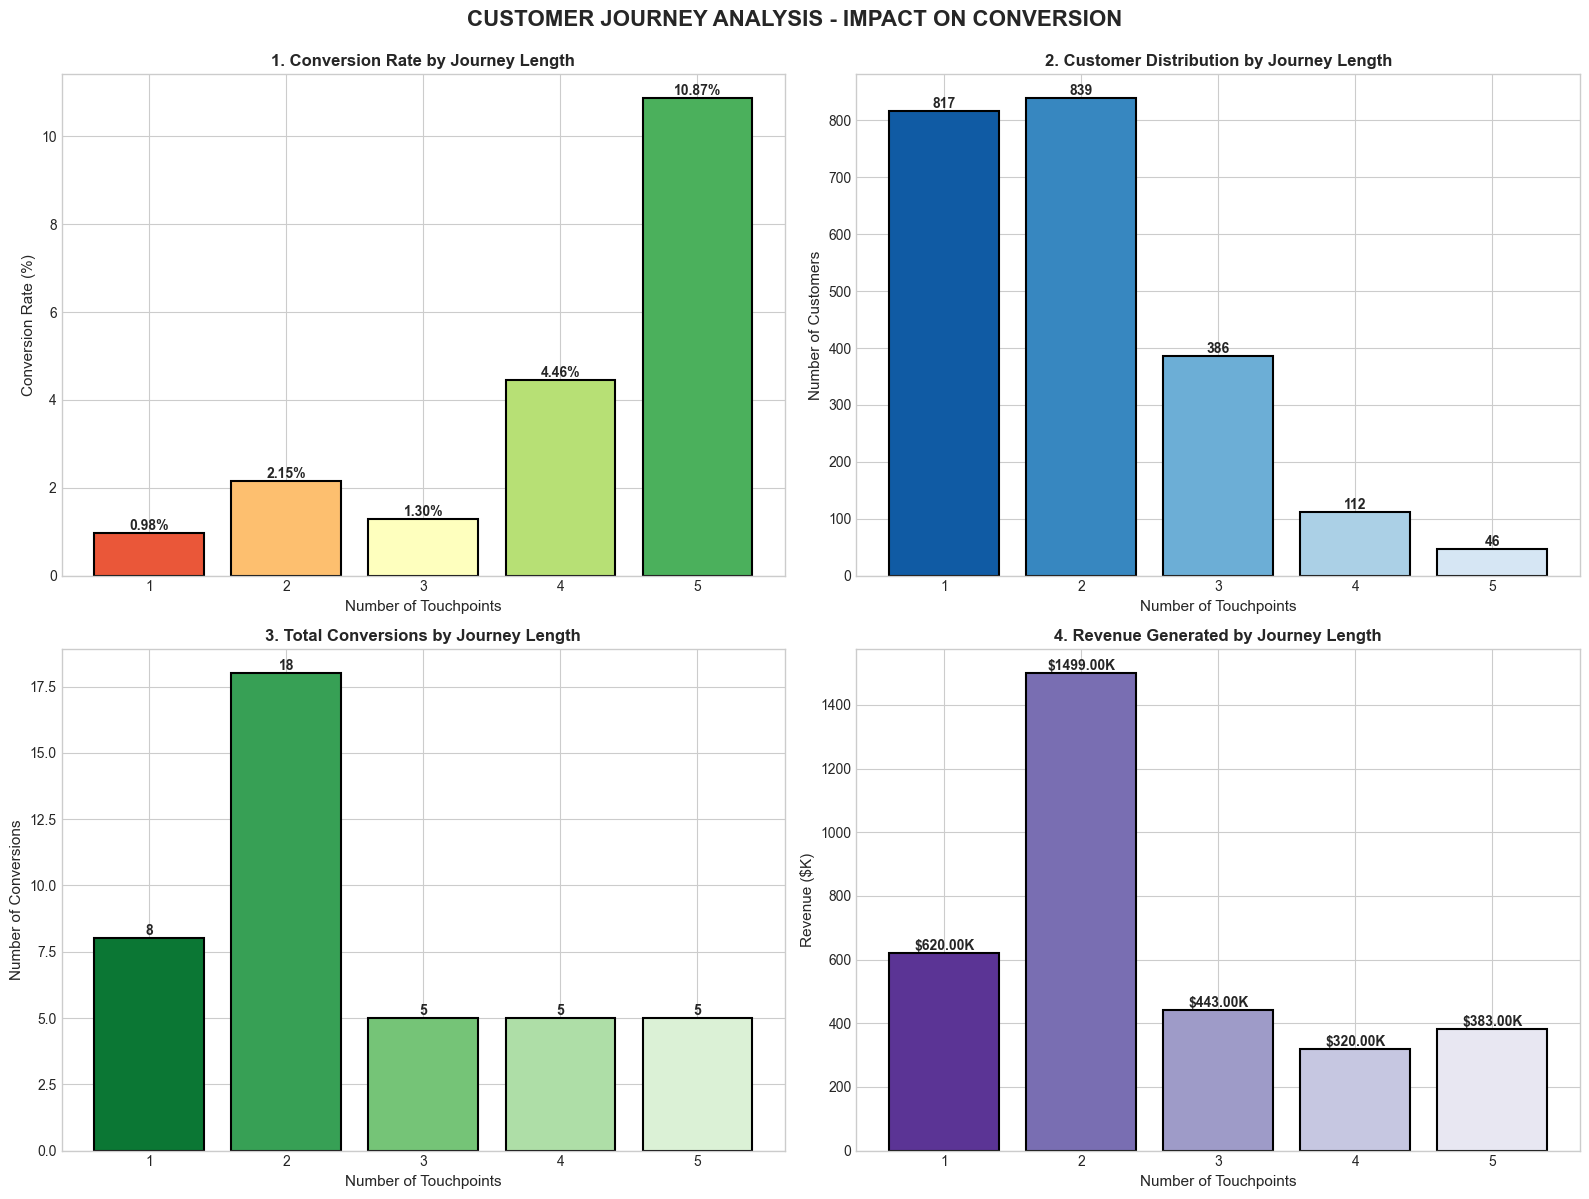

In [7]:
print("CUSTOMER JOURNEY ANALYSIS")
print(f"{'='*80}")

# Journey length impact
journey_impact = journeys_df.groupby('num_touches').agg({
    'customer_id': 'count',
    'converted': 'sum',
    'revenue': 'sum'
}).rename(columns={
    'customer_id': 'Total_Journeys',
    'converted': 'Conversions',
    'revenue': 'Revenue_K'
})

journey_impact['Conv_Rate_%'] = (journey_impact['Conversions'] / journey_impact['Total_Journeys'] * 100)
journey_impact['Avg_Revenue_Per_Conversion'] = journey_impact['Revenue_K'] / journey_impact['Conversions']
print(f"\nJOURNEY LENGTH IMPACT:")
print(journey_impact.to_string())

# Identify common journey paths
journey_paths = journeys_df[journeys_df['converted']]['channels'].apply(lambda x: ' → '.join(x)).value_counts().head(10)

print(f"\nTOP 10 CUSTOMER JOURNEYS (Converted Customers):")
for i, (path, count) in enumerate(journey_paths.items(), 1):
    pct = (count / journeys_df[journeys_df['converted']].shape[0] * 100)
    print(f"   {i}. {path} ({count} customers, {pct:.1f}%)")

# Journey analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('CUSTOMER JOURNEY ANALYSIS - IMPACT ON CONVERSION', fontsize=16, fontweight='bold', y=0.995)

# Conversion Rate by Journey Length
ax = axes[0, 0]
conv_by_length = journey_impact['Conv_Rate_%']
colors = sns.color_palette('RdYlGn', len(conv_by_length))
bars = ax.bar(conv_by_length.index, conv_by_length.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Number of Touchpoints')
ax.set_ylabel('Conversion Rate (%)')
ax.set_title('1. Conversion Rate by Journey Length', fontweight='bold', fontsize=12)
ax.set_xticks(conv_by_length.index)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

# Journey Distribution
ax = axes[0, 1]
journey_dist = journeys_df['num_touches'].value_counts().sort_index()
colors = sns.color_palette('Blues_r', len(journey_dist))
bars = ax.bar(journey_dist.index, journey_dist.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Number of Touchpoints')
ax.set_ylabel('Number of Customers')
ax.set_title('2. Customer Distribution by Journey Length', fontweight='bold', fontsize=12)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# Total Conversions by Journey Length
ax = axes[1, 0]
conv_count = journey_impact['Conversions']
colors = sns.color_palette('Greens_r', len(conv_count))
bars = ax.bar(conv_count.index, conv_count.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Number of Touchpoints')
ax.set_ylabel('Number of Conversions')
ax.set_title('3. Total Conversions by Journey Length', fontweight='bold', fontsize=12)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Revenue Impact of Journey Length
ax = axes[1, 1]
revenue_by_length = journey_impact['Revenue_K']
colors = sns.color_palette('Purples_r', len(revenue_by_length))
bars = ax.bar(revenue_by_length.index, revenue_by_length.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Number of Touchpoints')
ax.set_ylabel('Revenue ($K)')
ax.set_title('4. Revenue Generated by Journey Length', fontweight='bold', fontsize=12)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.2f}K', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../output/customer_journey_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ROI & Performance Analysis
## 7, Which marketing channels deliver the best return on investment, and how should we classify their performance?


ROI ANALYSIS BY CHANNEL:
       Channel  Attributed_Revenue_K  Marketing_Spend       ROI_%      ROAS  Efficiency_Score
   Paid Search                840.52            90000  833.911111  9.339111              9.34
         Email                620.74            20000 3003.700000 31.037000             31.04
Organic Search                526.09                0    0.000000       inf               inf
        Direct                445.22                0    0.000000       inf               inf
        Social                331.42            60000  452.366667  5.523667              5.52
      Referral                289.45            25000 1057.800000 11.578000             11.58
       Display                211.57            35000  504.485714  6.044857              6.04

 PERFORMANCE TIER CLASSIFICATION:
   Excellent: Paid Search, Email, Social, Referral, Display
   Poor: Organic Search, Direct


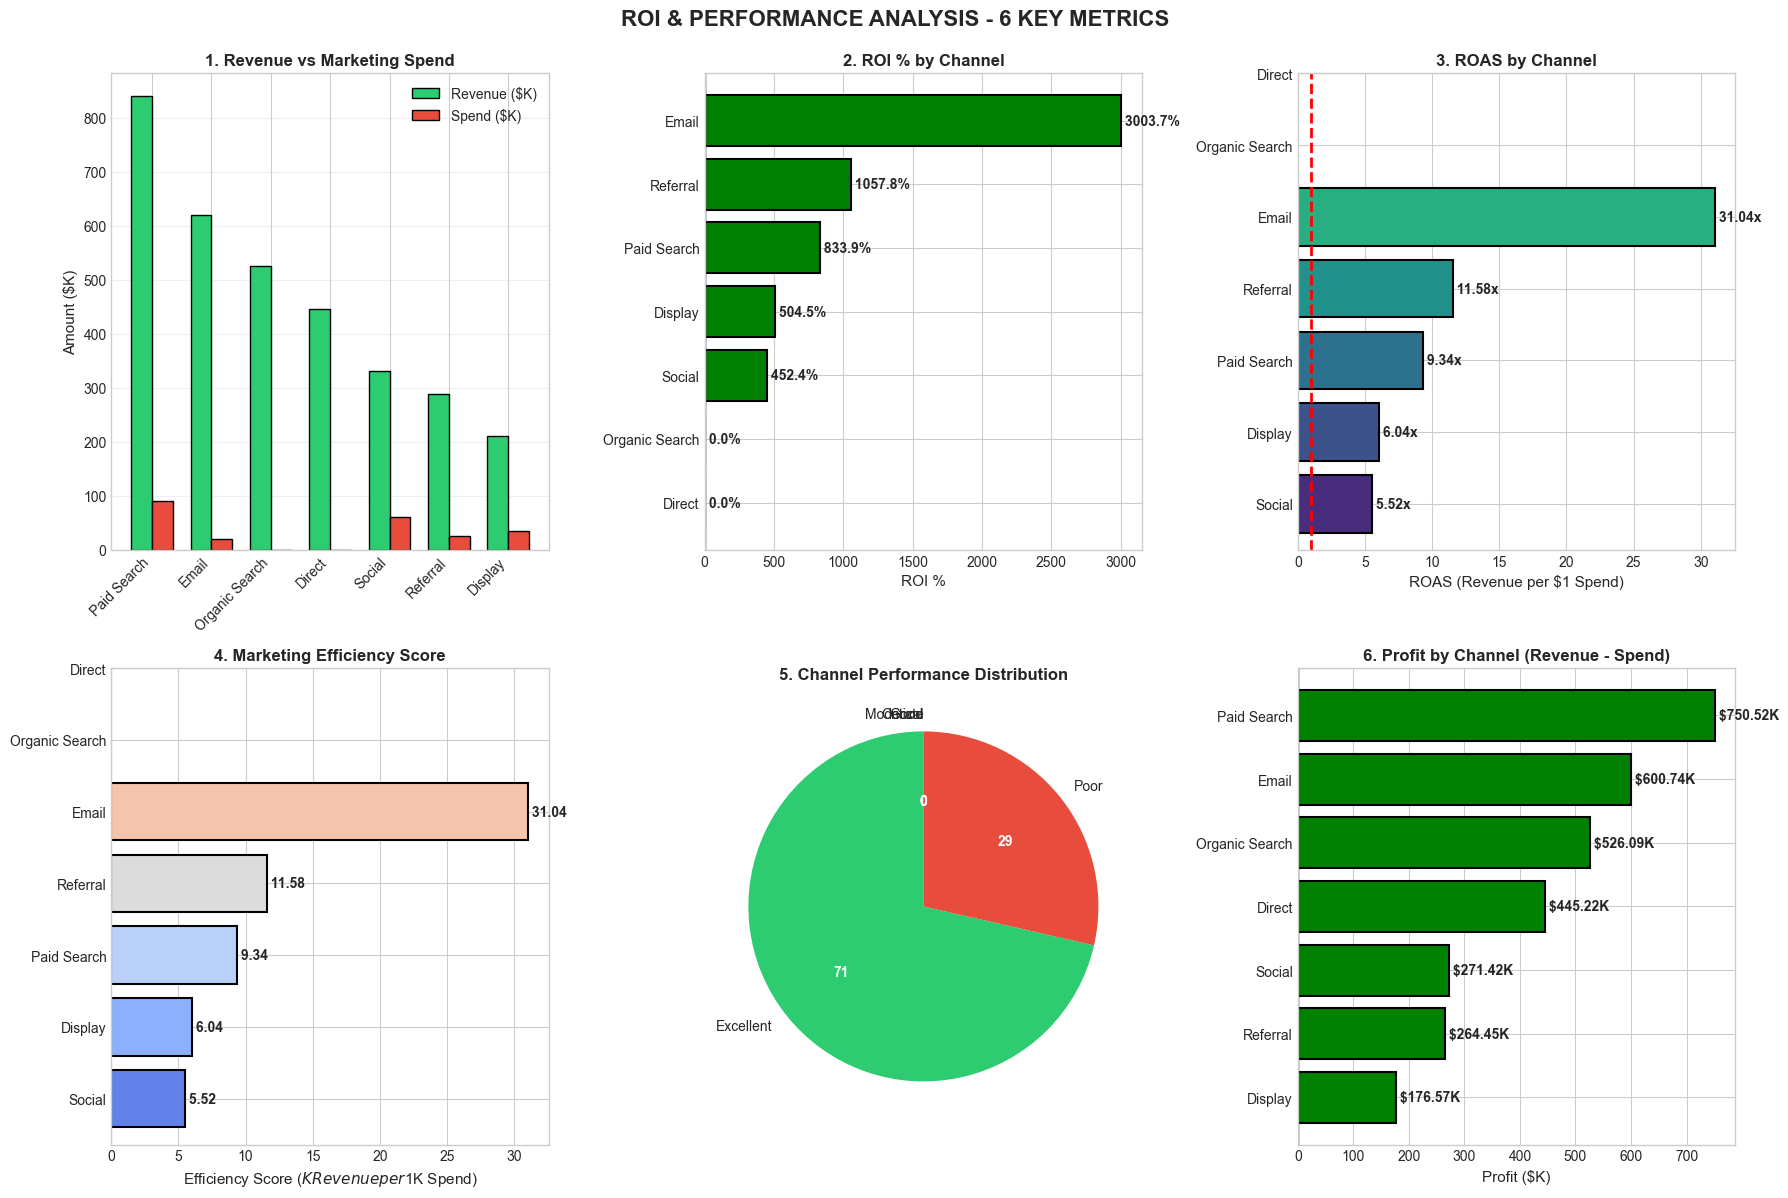

In [8]:
#  ROI & PERFORMANCE ANALYSIS
# Get spend data
spend_data = df_spend.set_index('Channel').to_dict()['Total_Spend']

#  ROI metrics
roi_analysis = attribution_comparison['Average'].to_frame('Revenue_K').reset_index()
roi_analysis.columns = ['Channel', 'Attributed_Revenue_K']
roi_analysis['Marketing_Spend'] = roi_analysis['Channel'].map(spend_data)
roi_analysis['ROI_%'] = ((roi_analysis['Attributed_Revenue_K'] - roi_analysis['Marketing_Spend'] / 1000) / (roi_analysis['Marketing_Spend'] / 1000) * 100).replace([np.inf, -np.inf], 0)
roi_analysis['ROAS'] = roi_analysis['Attributed_Revenue_K'] / (roi_analysis['Marketing_Spend'] / 1000)
roi_analysis['Efficiency_Score'] = (roi_analysis['Attributed_Revenue_K'] * 1000 / roi_analysis['Marketing_Spend']).round(2)
roi_analysis = roi_analysis.sort_values('Attributed_Revenue_K', ascending=False)

print(f"\nROI ANALYSIS BY CHANNEL:")
print(roi_analysis.to_string(index=False))

# Channel tier classification
roi_analysis['Performance_Tier'] = pd.cut(roi_analysis['ROI_%'], 
                                          bins=[-np.inf, -20, 0, 10, 50, np.inf],
                                          labels=['Critical', 'Poor', 'Moderate', 'Good', 'Excellent'])

print(f"\n PERFORMANCE TIER CLASSIFICATION:")
for tier in ['Excellent', 'Good', 'Moderate', 'Poor', 'Critical']:
    channels = roi_analysis[roi_analysis['Performance_Tier'] == tier]['Channel'].tolist()
    if channels:
        print(f"   {tier}: {', '.join(channels)}")

# ROI visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('ROI & PERFORMANCE ANALYSIS - 6 KEY METRICS', fontsize=16, fontweight='bold', y=0.995)

# Revenue vs Spend
ax = axes[0, 0]
x_pos = np.arange(len(roi_analysis))
width = 0.35
revenue = roi_analysis['Attributed_Revenue_K']
spend = roi_analysis['Marketing_Spend'] / 1000
bars1 = ax.bar(x_pos - width/2, revenue, width, label='Revenue ($K)', color='#2ecc71', edgecolor='black', linewidth=1)
bars2 = ax.bar(x_pos + width/2, spend, width, label='Spend ($K)', color='#e74c3c', edgecolor='black', linewidth=1)
ax.set_xticks(x_pos)
ax.set_xticklabels(roi_analysis['Channel'], rotation=45, ha='right')
ax.set_ylabel('Amount ($K)')
ax.set_title('1. Revenue vs Marketing Spend', fontweight='bold', fontsize=12)
ax.legend()
ax.grid(axis='y', alpha=0.3)

#  ROI %
ax = axes[0, 1]
roi_sorted = roi_analysis.sort_values('ROI_%')
colors = ['red' if x < 0 else 'green' for x in roi_sorted['ROI_%']]
bars = ax.barh(range(len(roi_sorted)), roi_sorted['ROI_%'], color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(roi_sorted)))
ax.set_yticklabels(roi_sorted['Channel'])
ax.set_xlabel('ROI %')
ax.set_title('2. ROI % by Channel', fontweight='bold', fontsize=12)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
for i, val in enumerate(roi_sorted['ROI_%']):
    ax.text(val, i, f' {val:.1f}%', va='center', fontweight='bold')

# ROAS (Return on Ad Spend)
ax = axes[0, 2]
roas_sorted = roi_analysis.sort_values('ROAS')
colors = sns.color_palette('viridis', len(roas_sorted))
bars = ax.barh(range(len(roas_sorted)), roas_sorted['ROAS'], color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(roas_sorted)))
ax.set_yticklabels(roas_sorted['Channel'])
ax.set_xlabel('ROAS (Revenue per $1 Spend)')
ax.set_title('3. ROAS by Channel', fontweight='bold', fontsize=12)
ax.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Break-even')
for i, val in enumerate(roas_sorted['ROAS']):
    ax.text(val, i, f' {val:.2f}x', va='center', fontweight='bold')

# Efficiency Score
ax = axes[1, 0]
eff_sorted = roi_analysis.sort_values('Efficiency_Score')
colors = sns.color_palette('coolwarm', len(eff_sorted))
bars = ax.barh(range(len(eff_sorted)), eff_sorted['Efficiency_Score'], color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(eff_sorted)))
ax.set_yticklabels(eff_sorted['Channel'])
ax.set_xlabel('Efficiency Score ($K Revenue per $1K Spend)')
ax.set_title('4. Marketing Efficiency Score', fontweight='bold', fontsize=12)
for i, val in enumerate(eff_sorted['Efficiency_Score']):
    ax.text(val, i, f' {val:.2f}', va='center', fontweight='bold')

# Performance Tier Distribution (Pie)
ax = axes[1, 1]
tier_counts = roi_analysis['Performance_Tier'].value_counts()
colors_tier = {'Excellent': '#2ecc71', 'Good': '#f39c12', 'Moderate': '#3498db', 'Poor': '#e74c3c', 'Critical': '#c0392b'}
colors = [colors_tier.get(tier, 'gray') for tier in tier_counts.index]
wedges, texts, autotexts = ax.pie(tier_counts.values, labels=tier_counts.index, autopct='%1.0f',
                                    colors=colors, startangle=90)
ax.set_title('5. Channel Performance Distribution', fontweight='bold', fontsize=12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Profitability by Channel
ax = axes[1, 2]
roi_analysis['Profit_K'] = roi_analysis['Attributed_Revenue_K'] - (roi_analysis['Marketing_Spend'] / 1000)
profit_sorted = roi_analysis.sort_values('Profit_K')
colors = ['red' if x < 0 else 'green' for x in profit_sorted['Profit_K']]
bars = ax.barh(range(len(profit_sorted)), profit_sorted['Profit_K'], color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(profit_sorted)))
ax.set_yticklabels(profit_sorted['Channel'])
ax.set_xlabel('Profit ($K)')
ax.set_title('6. Profit by Channel (Revenue - Spend)', fontweight='bold', fontsize=12)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
for i, val in enumerate(profit_sorted['Profit_K']):
    ax.text(val, i, f' ${val:.2f}K', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../output/roi_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical Analysis & Hypothesis Testing
## 8, Are the observed differences in channel performance and multi-touch journeys statistically significant, or could they be due to random chance?


 1.CHI-SQUARE TEST: Do channels significantly differ in conversion?
   Chi-Square Statistic: 19.4075
   P-Value: 0.003528
   Degrees of Freedom: 6
   Effect Size (Cramér's V): 0.0669
   Result: STATISTICALLY SIGNIFICANT (p < 0.05)
   Interpretation: Channels DO significantly differ in conversion rates

 2.ANOVA TEST: Do devices significantly impact session duration?
   F-Statistic: 0.1815
   P-Value: 0.833994
   Result: NOT SIGNIFICANT
   Interpretation: Device type DOES NOT significantly impact session duration

3.CORRELATION ANALYSIS: What metrics are related?
   Pageviews vs Time on Site: r = 0.007 (p = 0.650382)
      Weak Positive Correlation
   Pageviews vs Bounces: r = 0.004 (p = 0.792069)
      Weak Positive Correlation
   Time on Site vs Conversions: r = -0.003 (p = 0.856266)
      Weak Negative Correlation
   Device Type vs Time on Site: r = 0.009 (p = 0.553223)
      Weak Positive Correlation

4. MULTI-TOUCH vs SINGLE-TOUCH ANALYSIS:
   Single-Touch Conversion Rate: 0.98%
 

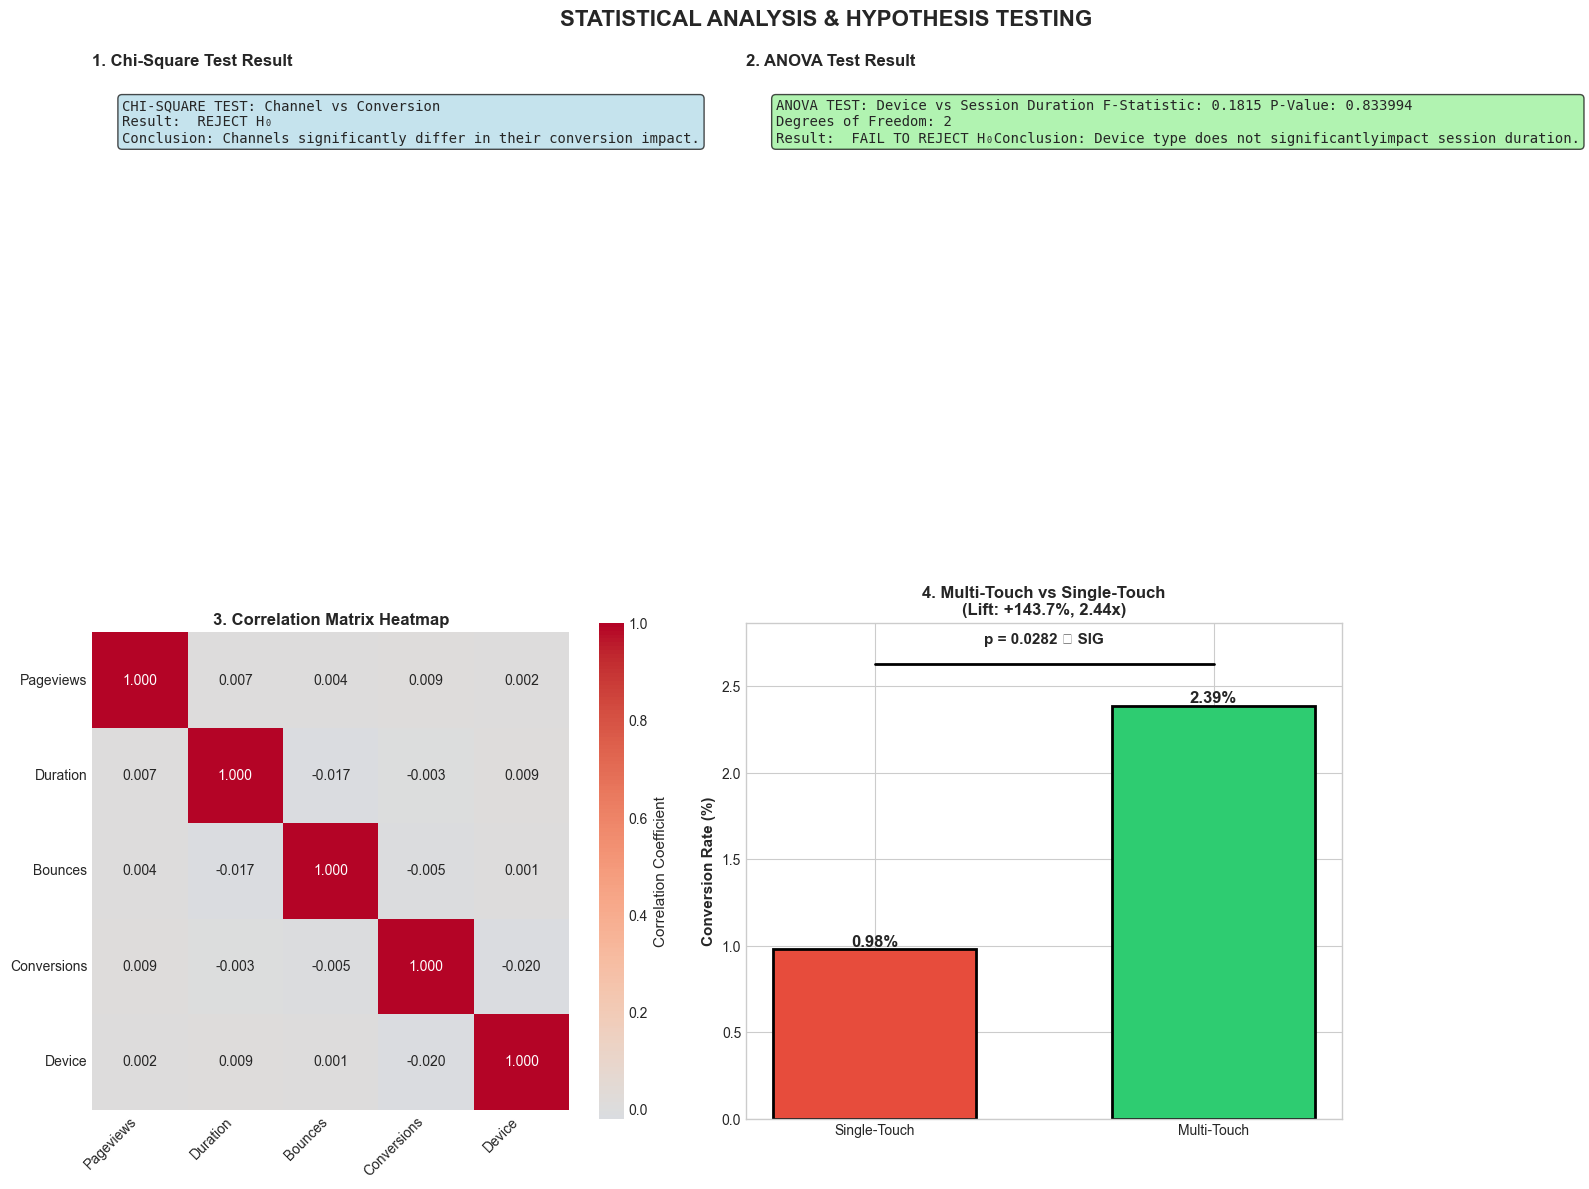

In [9]:
#  STATISTICAL ANALYSIS & HYPOTHESIS TESTING
# CHI-SQUARE TEST: Channel vs Conversion
print(f"\n 1.CHI-SQUARE TEST: Do channels significantly differ in conversion?")
contingency_table = pd.crosstab(df['channelGrouping'], df['totals.transactions'] > 0)
chi2, p_value_chi, dof, expected = stats.chi2_contingency(contingency_table)
effect_size_phi = np.sqrt(chi2 / len(df))

print(f"   Chi-Square Statistic: {chi2:.4f}")
print(f"   P-Value: {p_value_chi:.6f}")
print(f"   Degrees of Freedom: {dof}")
print(f"   Effect Size (Cramér's V): {effect_size_phi:.4f}")
print(f"   Result: {'STATISTICALLY SIGNIFICANT (p < 0.05)' if p_value_chi < 0.05 else ' NOT SIGNIFICANT'}")
print(f"   Interpretation: Channels {'DO' if p_value_chi < 0.05 else 'DO NOT'} significantly differ in conversion rates")

# ANOVA TEST: Device vs Time on Site
print(f"\n 2.ANOVA TEST: Do devices significantly impact session duration?")
device_groups = [group['totals.timeOnSite'].values for name, group in df.groupby('device.deviceCategory')]
f_stat, p_value_anova = stats.f_oneway(*device_groups)

print(f"   F-Statistic: {f_stat:.4f}")
print(f"   P-Value: {p_value_anova:.6f}")
print(f"   Result: {'STATISTICALLY SIGNIFICANT (p < 0.05)' if p_value_anova < 0.05 else 'NOT SIGNIFICANT'}")
print(f"   Interpretation: Device type {'DOES' if p_value_anova < 0.05 else 'DOES NOT'} significantly impact session duration")

#  CORRELATION ANALYSIS
print(f"\n3.CORRELATION ANALYSIS: What metrics are related?")
df['device_numeric'] = df['device.deviceCategory'].map({'desktop': 1, 'mobile': 2, 'tablet': 3})

# Key correlations
correlations = {
    'Pageviews vs Time on Site': pearsonr(df['totals.pageviews'], df['totals.timeOnSite']),
    'Pageviews vs Bounces': pearsonr(df['totals.pageviews'], df['totals.bounces']),
    'Time on Site vs Conversions': pearsonr(df['totals.timeOnSite'], df['totals.transactions']),
    'Device Type vs Time on Site': pearsonr(df['device_numeric'], df['totals.timeOnSite'])
}

for metric, (corr, p_val) in correlations.items():
    print(f"   {metric}: r = {corr:.3f} (p = {p_val:.6f})")
    print(f"      {'Strong' if abs(corr) > 0.7 else 'Moderate' if abs(corr) > 0.4 else 'Weak'} {'Positive' if corr > 0 else 'Negative'} Correlation")

# 4. MULTI-TOUCH VS SINGLE-TOUCH COMPARISON
print(f"\n4. MULTI-TOUCH vs SINGLE-TOUCH ANALYSIS:")
single_touch = journeys_df[journeys_df['num_touches'] == 1]
multi_touch = journeys_df[journeys_df['num_touches'] > 1]

single_conv = single_touch['converted'].sum() / len(single_touch) * 100
multi_conv = multi_touch['converted'].sum() / len(multi_touch) * 100
lift = ((multi_conv - single_conv) / single_conv) * 100

print(f"   Single-Touch Conversion Rate: {single_conv:.2f}%")
print(f"   Multi-Touch Conversion Rate: {multi_conv:.2f}%")
print(f"   Lift: {lift:+.1f}% ({multi_conv/single_conv:.2f}x)")

# Statistical test for multi-touch lift
single_conversions = single_touch['converted'].sum()
single_total = len(single_touch)
multi_conversions = multi_touch['converted'].sum()
multi_total = len(multi_touch)

chi2_lift, p_lift, _, _ = chi2_contingency([[single_total - single_conversions, single_conversions],
                                            [multi_total - multi_conversions, multi_conversions]])
print(f"   Statistical Significance: {' SIGNIFICANT' if p_lift < 0.05 else 'NOT SIGNIFICANT'}")

# Statistical visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('STATISTICAL ANALYSIS & HYPOTHESIS TESTING', fontsize=16, fontweight='bold', y=0.995)

# Chi-Square Test Results
ax = axes[0, 0]
ax.axis('off')
chi_text = f"""CHI-SQUARE TEST: Channel vs Conversion 
Result: {' REJECT H₀' if p_value_chi < 0.05 else ' FAIL TO REJECT H₀'} 
Conclusion: Channels {'significantly' if p_value_chi < 0.05 else 'do not significantly'} differ in their conversion impact."""
ax.text(0.05, 0.95, chi_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
ax.set_title('1. Chi-Square Test Result', fontweight='bold', fontsize=12, loc='left')

#  ANOVA Test Results
ax = axes[0, 1]
ax.axis('off')
anova_text = f"""ANOVA TEST: Device vs Session Duration F-Statistic: {f_stat:.4f} P-Value: {p_value_anova:.6f} 
Degrees of Freedom: {len(device_groups)-1} 
Result: {' REJECT H₀' if p_value_anova < 0.05 else ' FAIL TO REJECT H₀'}Conclusion: Device type {'significantly' if p_value_anova < 0.05 else 'does not significantly'}impact session duration."""
ax.text(0.05, 0.95, anova_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
ax.set_title('2. ANOVA Test Result', fontweight='bold', fontsize=12, loc='left')

#  Correlation Matrix Heatmap
ax = axes[1, 0]
correlation_cols = ['totals.pageviews', 'totals.timeOnSite', 'totals.bounces', 'totals.transactions', 'device_numeric']
corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, ax=ax,
            cbar_kws={'label': 'Correlation Coefficient'}, square=True)
ax.set_title('3. Correlation Matrix Heatmap', fontweight='bold', fontsize=12)
ax.set_xticklabels(['Pageviews', 'Duration', 'Bounces', 'Conversions', 'Device'], rotation=45, ha='right')
ax.set_yticklabels(['Pageviews', 'Duration', 'Bounces', 'Conversions', 'Device'], rotation=0)

# Multi-touch vs Single-touch Comparison
ax = axes[1, 1]
categories = ['Single-Touch', 'Multi-Touch']
conv_rates = [single_conv, multi_conv]
colors = ['#e74c3c', '#2ecc71']
bars = ax.bar(categories, conv_rates, color=colors, edgecolor='black', linewidth=2, width=0.6)
ax.set_ylabel('Conversion Rate (%)', fontweight='bold')
ax.set_title(f'4. Multi-Touch vs Single-Touch\n(Lift: {lift:+.1f}%, {multi_conv/single_conv:.2f}x)', 
             fontweight='bold', fontsize=12)
ax.set_ylim(0, max(conv_rates) * 1.2)

for i, (bar, rate) in enumerate(zip(bars, conv_rates)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# significance indicator
ax.plot([0, 1], [max(conv_rates) * 1.1, max(conv_rates) * 1.1], 'k-', linewidth=2)
ax.text(0.5, max(conv_rates) * 1.15, f'p = {p_lift:.4f} {"✅ SIG" if p_lift < 0.05 else "NS"}',
        ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('../output/statistical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 9,How can we reallocate marketing budget to maximize ROI and profitability based on channel performance data?

BUDGET OPTIMIZATION & STRATEGIC RECOMMENDATIONS

CURRENT SITUATION:
   Total Marketing Spend: $230,000.00
   Total Revenue Generated: $3,265,010.00
   Overall ROAS: 14.20x
   Average ROI: 836.0%
   Total Profit: $3,035,010.00

TOP PERFORMERS (Above Average ROI):
   Email                | ROI:  3003.7% | ROAS: 31.04x | Spend: $20,000
   Referral             | ROI:  1057.8% | ROAS: 11.58x | Spend: $25,000

 UNDERPERFORMERS (Below Average ROI):
   Organic Search       | ROI:     0.0% | ROAS: infx | Spend: $0
   Direct               | ROI:     0.0% | ROAS: infx | Spend: $0
   Social               | ROI:   452.4% | ROAS: 5.52x | Spend: $60,000
   Display              | ROI:   504.5% | ROAS: 6.04x | Spend: $35,000
   Paid Search          | ROI:   833.9% | ROAS: 9.34x | Spend: $90,000

OPTIMIZATION SCENARIO (Reallocate 30% from underperformers):
       Channel Current_Spend Reallocation_Amount Optimized_Spend Projected_Revenue_K Projected_Profit_K
   Paid Search       $90,000            $-27,

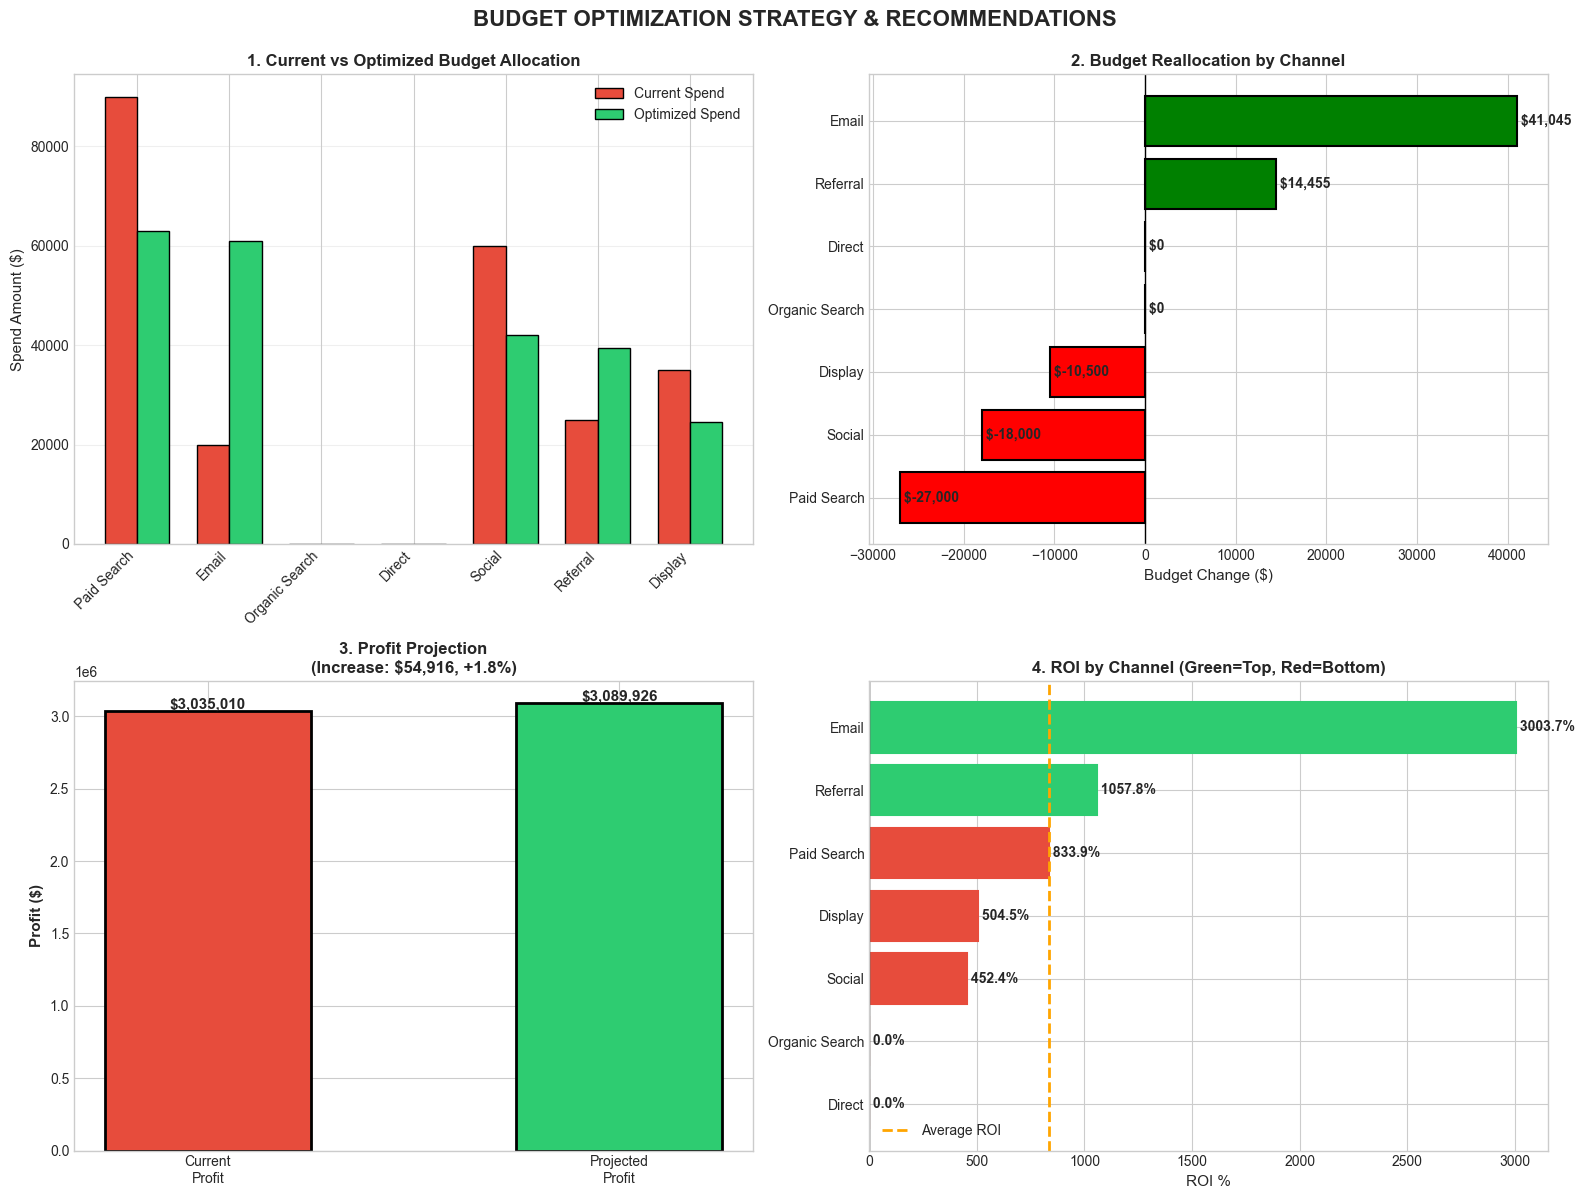

In [10]:
# BUDGET OPTIMIZATION & RECOMMENDATIONS
print("BUDGET OPTIMIZATION & STRATEGIC RECOMMENDATIONS")
print(f"{'='*80}")
total_spend = roi_analysis['Marketing_Spend'].sum()
total_revenue_generated = roi_analysis['Attributed_Revenue_K'].sum() * 1000
avg_roi = roi_analysis['ROI_%'].mean()
current_roas = total_revenue_generated / total_spend
print(f"\nCURRENT SITUATION:")
print(f"   Total Marketing Spend: ${total_spend:,.2f}")
print(f"   Total Revenue Generated: ${total_revenue_generated:,.2f}")
print(f"   Overall ROAS: {current_roas:.2f}x")
print(f"   Average ROI: {avg_roi:.1f}%")
print(f"   Total Profit: ${total_revenue_generated - total_spend:,.2f}")

# Budget optimization strategy
top_performers = roi_analysis[roi_analysis['ROI_%'] > avg_roi].sort_values('ROI_%', ascending=False)
underperformers = roi_analysis[roi_analysis['ROI_%'] <= avg_roi].sort_values('ROI_%')
print(f"\nTOP PERFORMERS (Above Average ROI):")
for idx, row in top_performers.iterrows():
    print(f"   {row['Channel']:20s} | ROI: {row['ROI_%']:7.1f}% | ROAS: {row['ROAS']:.2f}x | Spend: ${row['Marketing_Spend']:,.0f}")

print(f"\n UNDERPERFORMERS (Below Average ROI):")
for idx, row in underperformers.iterrows():
    print(f"   {row['Channel']:20s} | ROI: {row['ROI_%']:7.1f}% | ROAS: {row['ROAS']:.2f}x | Spend: ${row['Marketing_Spend']:,.0f}")
reduction_rate = 0.30  # Reduce underperformers by 30%
reduction_amount = underperformers['Marketing_Spend'].sum() * reduction_rate
distribution_by_roi = top_performers['ROI_%'].sum()
optimization = roi_analysis.copy()
optimization['Current_Spend'] = optimization['Marketing_Spend']
optimization['Reallocation_Amount'] = 0.0

for idx, row in optimization.iterrows():
    if row['Channel'] in underperformers['Channel'].values:
        optimization.at[idx, 'Reallocation_Amount'] = -row['Marketing_Spend'] * reduction_rate
    elif row['Channel'] in top_performers['Channel'].values:
        allocation = (reduction_amount * row['ROI_%'] / distribution_by_roi)
        optimization.at[idx, 'Reallocation_Amount'] = allocation

optimization['Optimized_Spend'] = optimization['Current_Spend'] + optimization['Reallocation_Amount']
optimization['Projected_Revenue_K'] = optimization['Attributed_Revenue_K'] + (optimization['Reallocation_Amount'] / 1000 * optimization['ROAS'])
optimization['Projected_Profit_K'] = optimization['Projected_Revenue_K'] - (optimization['Optimized_Spend'] / 1000)

print(f"\nOPTIMIZATION SCENARIO (Reallocate 30% from underperformers):")
optimization_display = optimization[['Channel', 'Current_Spend', 'Reallocation_Amount', 'Optimized_Spend', 
                                      'Projected_Revenue_K', 'Projected_Profit_K']].copy()
optimization_display['Current_Spend'] = optimization_display['Current_Spend'].apply(lambda x: f'${x:,.0f}')
optimization_display['Reallocation_Amount'] = optimization_display['Reallocation_Amount'].apply(lambda x: f'${x:,.0f}')
optimization_display['Optimized_Spend'] = optimization_display['Optimized_Spend'].apply(lambda x: f'${x:,.0f}')
optimization_display['Projected_Revenue_K'] = optimization_display['Projected_Revenue_K'].apply(lambda x: f'${x:.2f}K')
optimization_display['Projected_Profit_K'] = optimization_display['Projected_Profit_K'].apply(lambda x: f'${x:.2f}K')

print(optimization_display.to_string(index=False))

# overall impact
current_profit = total_revenue_generated - total_spend
projected_revenue = (optimization['Projected_Revenue_K'].sum() * 1000)
projected_spend = optimization['Optimized_Spend'].sum()
projected_profit = projected_revenue - projected_spend
profit_increase = projected_profit - current_profit
revenue_increase = projected_revenue - total_revenue_generated

print(f"\nPROJECTED IMPACT:")
print(f"   Current Profit: ${current_profit:,.2f}")
print(f"   Projected Profit: ${projected_profit:,.2f}")
print(f"   Profit Increase: ${profit_increase:,.2f} ({(profit_increase/current_profit)*100:+.2f}%)")
print(f"   Revenue Increase: ${revenue_increase:,.2f}")
print(f"   Projected ROAS: {projected_revenue/projected_spend:.2f}x (vs {current_roas:.2f}x current)")

# Budget optimization visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('BUDGET OPTIMIZATION STRATEGY & RECOMMENDATIONS', fontsize=16, fontweight='bold', y=0.995)

# Current vs Optimized Budget
ax = axes[0, 0]
x_pos = np.arange(len(optimization))
width = 0.35
bars1 = ax.bar(x_pos - width/2, optimization['Current_Spend'], width, label='Current Spend',
               color='#e74c3c', edgecolor='black', linewidth=1)
bars2 = ax.bar(x_pos + width/2, optimization['Optimized_Spend'], width, label='Optimized Spend',
               color='#2ecc71', edgecolor='black', linewidth=1)
ax.set_xticks(x_pos)
ax.set_xticklabels(optimization['Channel'], rotation=45, ha='right')
ax.set_ylabel('Spend Amount ($)')
ax.set_title('1. Current vs Optimized Budget Allocation', fontweight='bold', fontsize=12)
ax.legend()
ax.grid(axis='y', alpha=0.3)

#  Budget Reallocation Waterfall
ax = axes[0, 1]
reallocation = optimization.sort_values('Reallocation_Amount')
colors = ['red' if x < 0 else 'green' for x in reallocation['Reallocation_Amount']]
bars = ax.barh(range(len(reallocation)), reallocation['Reallocation_Amount'], color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(reallocation)))
ax.set_yticklabels(reallocation['Channel'])
ax.set_xlabel('Budget Change ($)')
ax.set_title('2. Budget Reallocation by Channel', fontweight='bold', fontsize=12)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
for i, val in enumerate(reallocation['Reallocation_Amount']):
    ax.text(val, i, f' ${val:,.0f}', va='center', fontweight='bold')

# Profit Projection
ax = axes[1, 0]
scenarios = ['Current\nProfit', 'Projected\nProfit']
profits = [current_profit, projected_profit]
colors = ['#e74c3c', '#2ecc71']
bars = ax.bar(scenarios, profits, color=colors, edgecolor='black', linewidth=2, width=0.5)
ax.set_ylabel('Profit ($)', fontweight='bold')
ax.set_title(f'3. Profit Projection\n(Increase: ${profit_increase:,.0f}, +{(profit_increase/current_profit)*100:.1f}%)',
             fontweight='bold', fontsize=12)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

#  ROI Comparison by Channel
ax = axes[1, 1]
channels_sorted = roi_analysis.sort_values('ROI_%')
bars = ax.barh(range(len(channels_sorted)), channels_sorted['ROI_%'], color='#3498db', 
               edgecolor='black', linewidth=1.5, alpha=0.7)

# Highlight top and bottom
colors_list = list(ax.patches)
for i, (idx, row) in enumerate(channels_sorted.iterrows()):
    if row['Channel'] in top_performers['Channel'].values:
        colors_list[i].set_color('#2ecc71')
        colors_list[i].set_alpha(1)
    elif row['Channel'] in underperformers['Channel'].values:
        colors_list[i].set_color('#e74c3c')
        colors_list[i].set_alpha(1)

ax.set_yticks(range(len(channels_sorted)))
ax.set_yticklabels(channels_sorted['Channel'])
ax.set_xlabel('ROI %')
ax.set_title('4. ROI by Channel (Green=Top, Red=Bottom)', fontweight='bold', fontsize=12)
ax.axvline(x=avg_roi, color='orange', linestyle='--', linewidth=2, label='Average ROI')
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.legend()
for i, val in enumerate(channels_sorted['ROI_%']):
    ax.text(val, i, f' {val:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../output/budget_optimization.png', dpi=300, bbox_inches='tight')
plt.show()

## 10, How can the key findings, recommended actions, and financial impact of this analysis be summarized for decision-makers in a single view?

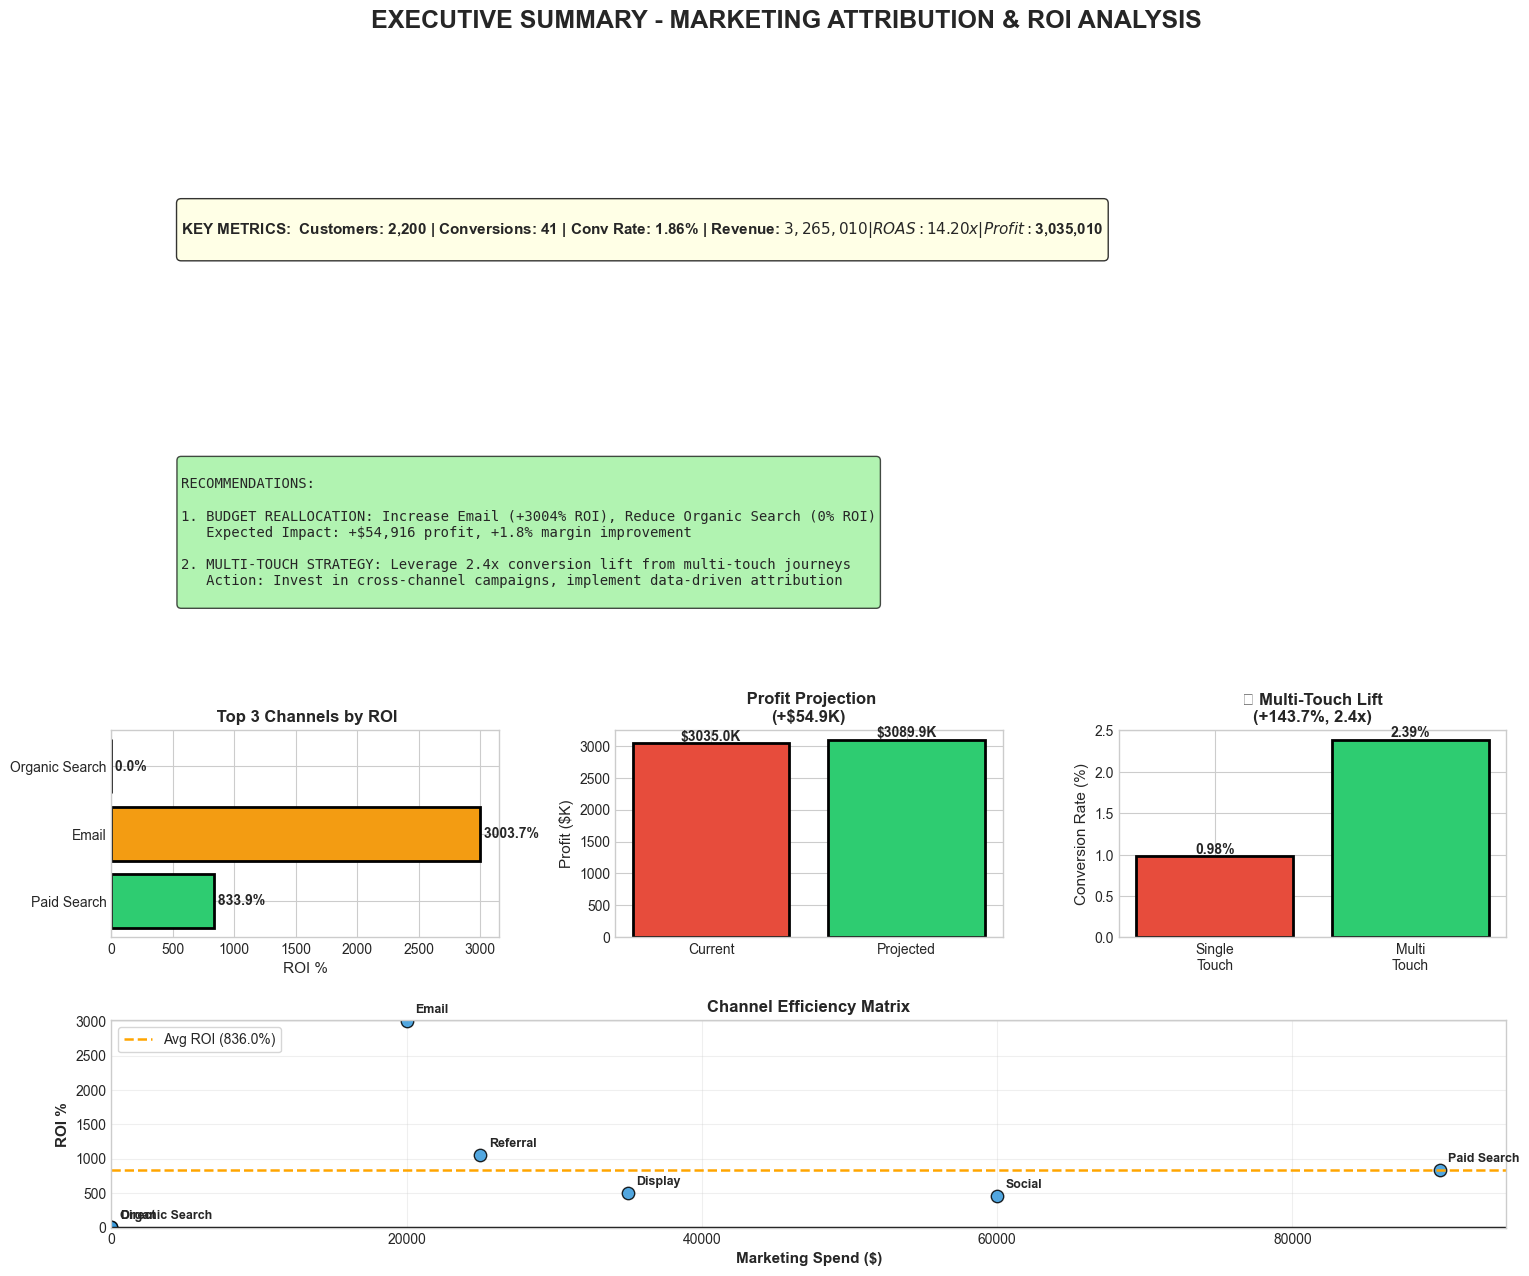


saved


In [11]:
# summary visualization
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.3)

fig.suptitle('EXECUTIVE SUMMARY - MARKETING ATTRIBUTION & ROI ANALYSIS', fontsize=18, fontweight='bold', y=0.98)
ax_summary = fig.add_subplot(gs[0, :])
ax_summary.axis('off')
summary_metrics = f"""
KEY METRICS:  Customers: {unique_customers:,} | Conversions: {int(total_conversions):,} | Conv Rate: {conversion_rate:.2f}% | Revenue: ${total_revenue_generated:,.0f} | ROAS: {current_roas:.2f}x | Profit: ${current_profit:,.0f}
"""
ax_summary.text(0.05, 0.5, summary_metrics, fontsize=11, fontweight='bold',bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Recommendations
ax_rec = fig.add_subplot(gs[1, :])
ax_rec.axis('off')
recommendations = f"""
RECOMMENDATIONS:

1. BUDGET REALLOCATION: Increase {top_performers.iloc[0]['Channel']} (+{top_performers.iloc[0]['ROI_%']:.0f}% ROI), Reduce {underperformers.iloc[0]['Channel']} ({underperformers.iloc[0]['ROI_%']:.0f}% ROI)
   Expected Impact: +${profit_increase:,.0f} profit, +{(profit_increase/current_profit)*100:.1f}% margin improvement

2. MULTI-TOUCH STRATEGY: Leverage {multi_conv/single_conv:.1f}x conversion lift from multi-touch journeys
   Action: Invest in cross-channel campaigns, implement data-driven attribution
"""
ax_rec.text(0.05, 0.9, recommendations, fontsize=10, fontfamily='monospace',
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# comparison charts
ax1 = fig.add_subplot(gs[2, 0])
comparison_channels = roi_analysis.head(3)['Channel'].tolist()
comparison_roi = roi_analysis.head(3)['ROI_%'].tolist()
colors_cmp = ['#2ecc71', '#f39c12', '#3498db']
bars = ax1.barh(range(len(comparison_channels)), comparison_roi, color=colors_cmp, edgecolor='black', linewidth=2)
ax1.set_yticks(range(len(comparison_channels)))
ax1.set_yticklabels(comparison_channels)
ax1.set_xlabel('ROI %')
ax1.set_title(' Top 3 Channels by ROI', fontweight='bold')
for i, val in enumerate(comparison_roi):
    ax1.text(val, i, f' {val:.1f}%', va='center', fontweight='bold')

# Profit comparison
ax2 = fig.add_subplot(gs[2, 1])
profit_scenarios = ['Current', 'Projected']
profit_values = [current_profit/1000, projected_profit/1000]
colors_profit = ['#e74c3c', '#2ecc71']
bars = ax2.bar(profit_scenarios, profit_values, color=colors_profit, edgecolor='black', linewidth=2)
ax2.set_ylabel('Profit ($K)')
ax2.set_title(f' Profit Projection\n(+${profit_increase/1000:.1f}K)', fontweight='bold')
for bar, val in zip(bars, profit_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.1f}K', ha='center', va='bottom', fontweight='bold')

ax3 = fig.add_subplot(gs[2, 2])
touch_types = ['Single\nTouch', 'Multi\nTouch']
touch_conv = [single_conv, multi_conv]
colors_touch = ['#e74c3c', '#2ecc71']
bars = ax3.bar(touch_types, touch_conv, color=colors_touch, edgecolor='black', linewidth=2)
ax3.set_ylabel('Conversion Rate (%)')
ax3.set_title(f'👥 Multi-Touch Lift\n(+{lift:.1f}%, {multi_conv/single_conv:.1f}x)', fontweight='bold')
for bar, val in zip(bars, touch_conv):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

ax4 = fig.add_subplot(gs[3, :])
scatter_data = (roi_analysis.sort_values('Marketing_Spend', ascending=False).head(7))
scatter = ax4.scatter(scatter_data['Marketing_Spend'],scatter_data['ROI_%'],color='#3498db',edgecolors='black',s=80,alpha=0.85)
for _, row in scatter_data.iterrows():
    ax4.annotate(row['Channel'],(row['Marketing_Spend'], row['ROI_%']),xytext=(6, 6),textcoords='offset points',fontsize=9,fontweight='bold')
ax4.axhline(y=avg_roi,color='orange',linestyle='--',linewidth=1.8,label=f'Avg ROI ({avg_roi:.1f}%)')
ax4.axhline(y=0,color='black',linestyle='-',linewidth=1)
ax4.set_xlabel('Marketing Spend ($)', fontweight='bold')
ax4.set_ylabel('ROI %', fontweight='bold')
ax4.set_title('Channel Efficiency Matrix', fontweight='bold', fontsize=12)
x_min, x_max = scatter_data['Marketing_Spend'].min(), scatter_data['Marketing_Spend'].max()
y_min, y_max = scatter_data['ROI_%'].min(), scatter_data['ROI_%'].max()
ax4.set_xlim(x_min * 0.9, x_max * 1.05)
ax4.set_ylim(y_min - 5, y_max + 10)
ax4.legend(loc='upper left', frameon=True)
ax4.grid(True, alpha=0.3)
plt.savefig('../output/executive_summary.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nsaved")